# Suicide data analysis ( INDIA )

In [1]:
import numpy as np      # for numeric, statisticsl analysis
import pandas as pd     # for storing csv in dataframe
import matplotlib.pyplot as plt
import seaborn as sns     # both for graphs/charts

In [2]:
%matplotlib inline     
                        # to avoid pop-ups of graphs, instead present them in line

In [3]:
# storing csv file as pandas data frame
data = pd.read_csv('Suicide data.csv')

In [4]:
data.head(5)

,State,Year,Type_code,Type,Gender,Age_group,Total
0,A & N ISLANDS,2001,Causes,Cancer,Male,15-29,0
1,A & N ISLANDS,2001,Causes,Divorce,Male,60+,0
2,A & N ISLANDS,2001,Causes,Dowry Dispute,Female,60+,0
3,A & N ISLANDS,2001,Causes,Ideological Causes/Hero Worshipping,Female,60+,0
4,A & N ISLANDS,2001,Causes,Illness (Aids/STD),Female,0-14,0


In [5]:
data.shape

(237519, 7)

In [6]:
column_names = data.columns

In [7]:
column_names[1]

'Year'

In [8]:
type(column_names)

pandas.core.indexes.base.Index

In [9]:
column_names = list(column_names)

In [10]:
type(column_names)

list

In [11]:
column_names

['State', 'Year', 'Type_code', 'Type', 'Gender', 'Age_group', 'Total']

In [12]:
len(column_names)

7

* column_names contains heading names for this data, in form of list
* 7 columns 

## checking data of individual column

-------------------------State

In [13]:
state = data[column_names[0]]

In [14]:
state.head()

0    A & N ISLANDS
1    A & N ISLANDS
2    A & N ISLANDS
3    A & N ISLANDS
4    A & N ISLANDS
Name: State, dtype: object

In [15]:
state.unique()

array(['A & N ISLANDS', 'ANDHRA PRADESH', 'ARUNACHAL PRADESH', 'ASSAM',
       'BIHAR', 'CHANDIGARH', 'CHHATTISGARH', 'D & N HAVELI',
       'DAMAN & DIU', 'DELHI (UT)', 'GOA', 'GUJARAT', 'HARYANA',
       'HIMACHAL PRADESH', 'JAMMU & KASHMIR', 'JHARKHAND', 'KARNATAKA',
       'KERALA', 'LAKSHADWEEP', 'MADHYA PRADESH', 'MAHARASHTRA',
       'MANIPUR', 'MEGHALAYA', 'MIZORAM', 'NAGALAND', 'ODISHA',
       'PUDUCHERRY', 'PUNJAB', 'RAJASTHAN', 'SIKKIM', 'TAMIL NADU',
       'TOTAL (ALL INDIA)', 'TOTAL (STATES)', 'TOTAL (UTs)', 'TRIPURA',
       'UTTAR PRADESH', 'UTTARAKHAND', 'WEST BENGAL'], dtype=object)

* As can be seen here we have, not just states, but uinon terrories & some extra data

#### getting list of all states, union terrories, extra into seperate lists
* by copy pasting from above

In [16]:
state_list = [ 'ANDHRA PRADESH', 'ARUNACHAL PRADESH', 'ASSAM',
       'BIHAR', 'CHHATTISGARH', 'GOA', 'GUJARAT', 'HARYANA',
       'HIMACHAL PRADESH', 'JAMMU & KASHMIR', 'JHARKHAND', 'KARNATAKA',
       'KERALA', 'MADHYA PRADESH', 'MAHARASHTRA',
       'MANIPUR', 'MEGHALAYA', 'MIZORAM', 'NAGALAND', 'ODISHA', 'PUNJAB', 'RAJASTHAN', 'SIKKIM', 'TAMIL NADU', 'TRIPURA',
       'UTTAR PRADESH', 'UTTARAKHAND', 'WEST BENGAL']
UT_list = ['A & N ISLANDS', 'CHANDIGARH', 'D & N HAVELI',
       'DAMAN & DIU', 'DELHI (UT)', 'LAKSHADWEEP',
       'PUDUCHERRY']
extra_list = ['TOTAL (ALL INDIA)', 'TOTAL (STATES)', 'TOTAL (UTs)']

In [17]:
len(state_list),len(UT_list),len(extra_list)

(28, 7, 3)

* why states are just 28 ?
* They missed TELANGANA

##### Later targets 
* dividing data into state_data / UT data / extra data
* putting half of 'ARUNACHAL PRADESH' into new rows 'TELANGANA'

-----------------------Year

In [18]:
years = list(data[column_names[1]].unique())

In [19]:
years

[2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012]

* Year contains data of 2001 - 2012
* years is list type containing 2001-2012

-------------------Type_code

In [20]:
info_type = list(data[column_names[2]].unique())

In [21]:
info_type

['Causes',
 'Means_adopted',
 'Professional_Profile',
 'Education_Status',
 'Social_Status']

* We have 5 info_types
* info_type is list

-------------------info

In [22]:
info = list(data[column_names[3]].unique())
info

['Cancer',
 'Divorce',
 'Dowry Dispute',
 'Ideological Causes/Hero Worshipping',
 'Illness (Aids/STD)',
 'Paralysis',
 'Property Dispute',
 'Suspected/Illicit Relation',
 'By Consuming Insecticides',
 'By Fire/Self Immolation',
 'By Hanging',
 'By Machine',
 'By Other means (please specify)',
 'By Overdose of sleeping pills',
 'By Self Infliction of injury',
 'By touching electric wires',
 'House Wife',
 'Others (Please Specify)',
 'Public Sector Undertaking',
 'Self-employed (Business activity)',
 'Service (Government)',
 'Bankruptcy or Sudden change in Economic Status',
 'Cancellation/Non-Settlement of Marriage',
 'Death of Dear Person',
 'By coming under running vehicles/trains',
 'By Fire-Arms',
 'By Other means',
 'Farming/Agriculture Activity',
 'Retired Person',
 'Failure in Examination',
 'Fall in Social Reputation',
 'Family Problems',
 'Illegitimate Pregnancy',
 'Other Prolonged Illness',
 'Hr. Secondary/Intermediate/Pre-Universit',
 'By Drowning',
 'By Jumping from (Other si

* info is linked to info-type
* so creating dictionatry with info_type as keys, & respected info as values

In [23]:
d = {}
for i in info_type:
    g = data[data['Type_code']==i]
    g = g['Type'].unique()
    for j in g:
        d[i]=list(g)

In [24]:
d

{'Causes': ['Cancer',
  'Divorce',
  'Dowry Dispute',
  'Ideological Causes/Hero Worshipping',
  'Illness (Aids/STD)',
  'Paralysis',
  'Property Dispute',
  'Suspected/Illicit Relation',
  'Bankruptcy or Sudden change in Economic Status',
  'Cancellation/Non-Settlement of Marriage',
  'Death of Dear Person',
  'Failure in Examination',
  'Fall in Social Reputation',
  'Family Problems',
  'Illegitimate Pregnancy',
  'Other Prolonged Illness',
  'Bankruptcy or Sudden change in Economic',
  'Insanity/Mental Illness',
  'Love Affairs',
  'Other Causes (Please Specity)',
  'Physical Abuse (Rape/Incest Etc.)',
  'Poverty',
  'Professional/Career Problem',
  'Unemployment',
  'Drug Abuse/Addiction',
  'Not having Children(Barrenness/Impotency',
  'Causes Not known',
  'Not having Children (Barrenness/Impotency'],
 'Means_adopted': ['By Consuming Insecticides',
  'By Fire/Self Immolation',
  'By Hanging',
  'By Machine',
  'By Other means (please specify)',
  'By Overdose of sleeping pills',

* there are duplicates in this

Under Causes ----------------------
Bankruptcy or Sudden change in Economic -----
Bankruptcy or Sudden change in Economic Status 

Under Causes ------------------------
Not having Children (Barrenness/Impotency ------
Not having Children(Barrenness/Impotency 

Under Causes -----------------------
Causes Not known----
Other Causes (Please Specity)

Under Means_adopted ---------------
By Other means (please specify)----
By Other means

* testing if replace can be possible

In [25]:
p = data

In [26]:
p.head()

,State,Year,Type_code,Type,Gender,Age_group,Total
0,A & N ISLANDS,2001,Causes,Cancer,Male,15-29,0
1,A & N ISLANDS,2001,Causes,Divorce,Male,60+,0
2,A & N ISLANDS,2001,Causes,Dowry Dispute,Female,60+,0
3,A & N ISLANDS,2001,Causes,Ideological Causes/Hero Worshipping,Female,60+,0
4,A & N ISLANDS,2001,Causes,Illness (Aids/STD),Female,0-14,0


In [27]:
p.Total[p['Type']=='Bankruptcy or Sudden change in Economic'].sum()

32755

In [28]:
p.Total[p['Type']=='Bankruptcy or Sudden change in Economic Status'].sum()

2655

In [29]:
p.Type[p['Type']=='Bankruptcy or Sudden change in Economic'] = 'Bankruptcy'

C:\Users\Acer\AppData\Local\Temp\ipykernel_19168\3958689813.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p.Type[p['Type']=='Bankruptcy or Sudden change in Economic'] = 'Bankruptcy'


In [30]:
p.Total[p['Type']=='Bankruptcy'].sum()

32755

In [31]:
p.Type[p['Type']=='Bankruptcy or Sudden change in Economic Status'] = 'Bankruptcy'

C:\Users\Acer\AppData\Local\Temp\ipykernel_19168\577234492.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p.Type[p['Type']=='Bankruptcy or Sudden change in Economic Status'] = 'Bankruptcy'


In [32]:
p.Total[p['Type']=='Bankruptcy'].sum()

35410

In [33]:
2655+32755

35410

* Yes change can be done
* changing all errored terms

In [34]:
data.head()

,State,Year,Type_code,Type,Gender,Age_group,Total
0,A & N ISLANDS,2001,Causes,Cancer,Male,15-29,0
1,A & N ISLANDS,2001,Causes,Divorce,Male,60+,0
2,A & N ISLANDS,2001,Causes,Dowry Dispute,Female,60+,0
3,A & N ISLANDS,2001,Causes,Ideological Causes/Hero Worshipping,Female,60+,0
4,A & N ISLANDS,2001,Causes,Illness (Aids/STD),Female,0-14,0


In [35]:
data.Type[p['Type']=='Bankruptcy or Sudden change in Economic Status'] = 'Bankruptcy'
data.Type[p['Type']=='Bankruptcy or Sudden change in Economic'] = 'Bankruptcy'
data.Type[p['Type']=='Not having Children(Barrenness/Impotency'] = 'Impotency'
data.Type[p['Type']=='Not having Children (Barrenness/Impotency '] = 'Impotency'
data.Type[p['Type']=='Not having Children (Barrenness/Impotency']='Impotency'
data.Type[p['Type']=='Causes Not known'] = 'Other Causes'
data.Type[p['Type']=='Other Causes (Please Specity)'] = 'Other Causes'
data.Type[p['Type']=='By Other means (please specify)'] = 'By Other means'


C:\Users\Acer\AppData\Local\Temp\ipykernel_19168\2916552216.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.Type[p['Type']=='Bankruptcy or Sudden change in Economic Status'] = 'Bankruptcy'
C:\Users\Acer\AppData\Local\Temp\ipykernel_19168\2916552216.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.Type[p['Type']=='Bankruptcy or Sudden change in Economic'] = 'Bankruptcy'
C:\Users\Acer\AppData\Local\Temp\ipykernel_19168\2916552216.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/sta

* creating nwe dictionary d

In [36]:
d = {}
for i in info_type:
    g = data[data['Type_code']==i]
    g = g['Type'].unique()
    for j in g:
        d[i]=list(g)

In [37]:
d

{'Causes': ['Cancer',
  'Divorce',
  'Dowry Dispute',
  'Ideological Causes/Hero Worshipping',
  'Illness (Aids/STD)',
  'Paralysis',
  'Property Dispute',
  'Suspected/Illicit Relation',
  'Bankruptcy',
  'Cancellation/Non-Settlement of Marriage',
  'Death of Dear Person',
  'Failure in Examination',
  'Fall in Social Reputation',
  'Family Problems',
  'Illegitimate Pregnancy',
  'Other Prolonged Illness',
  'Insanity/Mental Illness',
  'Love Affairs',
  'Other Causes',
  'Physical Abuse (Rape/Incest Etc.)',
  'Poverty',
  'Professional/Career Problem',
  'Unemployment',
  'Drug Abuse/Addiction',
  'Impotency'],
 'Means_adopted': ['By Consuming Insecticides',
  'By Fire/Self Immolation',
  'By Hanging',
  'By Machine',
  'By Other means',
  'By Overdose of sleeping pills',
  'By Self Infliction of injury',
  'By touching electric wires',
  'By coming under running vehicles/trains',
  'By Fire-Arms',
  'By Drowning',
  'By Jumping from (Other sites)',
  'By Over Alcoholism',
  'By Jum

* all duplicates removed

-----------------------Gender

In [38]:
genders = list(data[column_names[4]].unique())
genders

['Male', 'Female']

* duplicates are removed from data

------------------------Age_group

In [39]:
age = list(data[column_names[5]].unique())
age

['15-29', '60+', '0-14', '45-59', '30-44', '0-100+']

* How can there be '0-100' if others exist
* checking out data with '0-100'

In [40]:
data[data['Age_group']=='0-100+'].Type_code.unique()

array(['Education_Status', 'Social_Status'], dtype=object)

In [41]:
data[data['Age_group']=='0-14'].Type_code.unique()

array(['Causes', 'Means_adopted', 'Professional_Profile'], dtype=object)

In [42]:
data[data['Type_code']=='Education_Status'].Age_group.unique()

array(['0-100+'], dtype=object)

In [43]:
data[data['Type_code']=='Social_Status'].Age_group.unique()

array(['0-100+'], dtype=object)

In [44]:
data[data['Type_code']=='Causes'].Age_group.unique()

array(['15-29', '60+', '0-14', '45-59', '30-44'], dtype=object)

In [45]:
data[data['Type_code']=='Means_adopted'].Age_group.unique()

array(['0-14', '30-44', '45-59', '60+', '15-29'], dtype=object)

In [46]:
data[data['Type_code']=='Professional_Profile'].Age_group.unique()

array(['60+', '0-14', '30-44', '15-29', '45-59'], dtype=object)

* '0-100' is used for 'Education_Status', 'Social_Status'
* other are used for 'Causes', 'Means_adopted', 'Professional_Profile'
##### using 'Professional_Profile' & 'Causes' if we link it with age group , we can remove false data

------------------Total
* checking if text, blank, fraction exist

In [47]:
total_list = list(data.Total)

In [48]:
len(total_list)

237519

In [49]:
data.shape

(237519, 7)

In [50]:
for i in range(237519):
    if type(total_list[i])==str:
        print('text detected')
    elif type(total_list[i])==None:
        print('blank detected')

In [51]:
a = []
j = 0
for i in total_list:
    a.append(type(total_list[j]))
    j+=1
# now a contains list of type in total_list

In [52]:
len(a)

237519

In [53]:
b = set(a)
b

{int}

* a contains just int

In [54]:
a[0]

int

In [55]:
max = 0
for i in range(237519):
    if max < total_list[i] :
        max = total_list[i]
max

63343

In [56]:
for i in total_list :
    if (i-int(i))!=0:
        print('fraction found')
    

* No errors found in 'Total' column

#### checking out fake data with  'Professional_Profile' & age group

In [57]:
data.head()

,State,Year,Type_code,Type,Gender,Age_group,Total
0,A & N ISLANDS,2001,Causes,Cancer,Male,15-29,0
1,A & N ISLANDS,2001,Causes,Divorce,Male,60+,0
2,A & N ISLANDS,2001,Causes,Dowry Dispute,Female,60+,0
3,A & N ISLANDS,2001,Causes,Ideological Causes/Hero Worshipping,Female,60+,0
4,A & N ISLANDS,2001,Causes,Illness (Aids/STD),Female,0-14,0


In [58]:
data[['Type_code','Type','Age_group']][data['Type_code']=='Professional_Profile'][data['Age_group']=='0-14']

C:\Users\Acer\AppData\Local\Temp\ipykernel_19168\66376505.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[['Type_code','Type','Age_group']][data['Type_code']=='Professional_Profile'][data['Age_group']=='0-14']


,Type_code,Type,Age_group
17,Professional_Profile,Others (Please Specify),0-14
59,Professional_Profile,Farming/Agriculture Activity,0-14
96,Professional_Profile,Student,0-14
106,Professional_Profile,Unemployed,0-14
124,Professional_Profile,Service (Government),0-14
...,...,...,...
237376,Professional_Profile,Service (Private),0-14
237418,Professional_Profile,Self-employed (Business activity),0-14
237450,Professional_Profile,Others (Please Specify),0-14
237466,Professional_Profile,Self-employed (Business activity),0-14


In [59]:
data[['Type_code','Type','Age_group']][data['Type_code']=='Professional_Profile'][data['Age_group']=='0-14'].Type.unique()

C:\Users\Acer\AppData\Local\Temp\ipykernel_19168\3694067583.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[['Type_code','Type','Age_group']][data['Type_code']=='Professional_Profile'][data['Age_group']=='0-14'].Type.unique()


array(['Others (Please Specify)', 'Farming/Agriculture Activity',
       'Student', 'Unemployed', 'Service (Government)',
       'Professional Activity', 'Self-employed (Business activity)',
       'Retired Person', 'Public Sector Undertaking', 'Service (Private)',
       'House Wife'], dtype=object)

#### !!!! some error is here, how can (0-14) be 
'Retired Person', 'Public Sector Undertaking', 'Service (Private)','House Wife'

#### checking out frequency of this error

In [60]:
professions = data[data['Type_code']=='Professional_Profile'].Type.unique()
professions , len(professions)

(array(['House Wife', 'Others (Please Specify)',
        'Public Sector Undertaking', 'Self-employed (Business activity)',
        'Service (Government)', 'Farming/Agriculture Activity',
        'Retired Person', 'Student', 'Unemployed', 'Service (Private)',
        'Professional Activity'], dtype=object),
 11)

In [61]:
professions[0]

'House Wife'

In [62]:
age_bracket = data[data['Type_code']=='Professional_Profile'].Age_group.unique()
age_bracket

array(['60+', '0-14', '30-44', '15-29', '45-59'], dtype=object)

In [63]:
counts = []
for i in age_bracket:
    c = data[data['Type_code']=='Professional_Profile'][data['Type']=='House Wife'][data['Age_group']==i].Total.sum()
    counts.append(c)
counts

C:\Users\Acer\AppData\Local\Temp\ipykernel_19168\1150050072.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c = data[data['Type_code']=='Professional_Profile'][data['Type']=='House Wife'][data['Age_group']==i].Total.sum()


[17044, 569, 96636, 127415, 43579]

<BarContainer object of 5 artists>

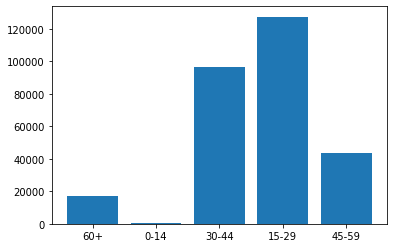

In [64]:
plt.bar(age_bracket,counts)

In [65]:
sum = 0
for i in counts:
    sum = sum + i
sum

285243

In [66]:
percentage =[1,2,3,4,5]
for i in range(5):
    percentage[i] = round(counts[i]*100/sum,2)
percentage

[5.98, 0.2, 33.88, 44.67, 15.28]

* negligible error of 0.2% in '0-14'

In [67]:
counts = []
for i in age_bracket:
    c = data[data['Type_code']=='Professional_Profile'][data['Age_group']==i].Total.sum()
    counts.append(c)
counts

C:\Users\Acer\AppData\Local\Temp\ipykernel_19168\1128720726.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c = data[data['Type_code']=='Professional_Profile'][data['Age_group']==i].Total.sum()


[114940, 32616, 488628, 509643, 293416]

In [68]:
sum = 0
for i in range(5):
    sum = sum + counts[i]
sum

1439243

In [69]:
for i in range(5):
    counts[i] = round(counts[i]*100/sum,2)
counts

[7.99, 2.27, 33.95, 35.41, 20.39]

* 0-14 composire of 2.27% fo people under 'Professional_Profile'

In [70]:
professions[2]

'Public Sector Undertaking'

In [71]:
counts = []
for i in age_bracket:
    c = data[data['Type_code']=='Professional_Profile'][data['Type']=='Public Sector Undertaking'][data['Age_group']==i].Total.sum()
    counts.append(c)
counts

C:\Users\Acer\AppData\Local\Temp\ipykernel_19168\3085667358.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c = data[data['Type_code']=='Professional_Profile'][data['Type']=='Public Sector Undertaking'][data['Age_group']==i].Total.sum()


[1155, 63, 12145, 9465, 7958]

* 63 is too small to neglect

In [72]:
professions[3]

'Self-employed (Business activity)'

In [73]:
counts = []
for i in age_bracket:
    c = data[data['Type_code']=='Professional_Profile'][data['Type']=='Self-employed (Business activity)'][data['Age_group']==i].Total.sum()
    counts.append(c)
counts

C:\Users\Acer\AppData\Local\Temp\ipykernel_19168\482434411.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c = data[data['Type_code']=='Professional_Profile'][data['Type']=='Self-employed (Business activity)'][data['Age_group']==i].Total.sum()


[4984, 253, 32179, 20291, 20405]

* 253 is small error

In [74]:
professions[4]

'Service (Government)'

In [75]:
counts = []
for i in age_bracket:
    c = data[data['Type_code']=='Professional_Profile'][data['Type']=='Service (Government)'][data['Age_group']==i].Total.sum()
    counts.append(c)
counts

C:\Users\Acer\AppData\Local\Temp\ipykernel_19168\2333392485.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c = data[data['Type_code']=='Professional_Profile'][data['Type']=='Service (Government)'][data['Age_group']==i].Total.sum()


[290, 15, 10142, 5911, 6967]

* 15 is small error can be ignored

In [76]:
professions[5]

'Farming/Agriculture Activity'

In [77]:
counts = []
for i in age_bracket:
    c = data[data['Type_code']=='Professional_Profile'][data['Type']=='Farming/Agriculture Activity'][data['Age_group']==i].Total.sum()
    counts.append(c)
counts

C:\Users\Acer\AppData\Local\Temp\ipykernel_19168\1885043712.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c = data[data['Type_code']=='Professional_Profile'][data['Type']=='Farming/Agriculture Activity'][data['Age_group']==i].Total.sum()


[20382, 1041, 73634, 52700, 50166]

* even though 1041 is a big number but it is not error, cause it is common for '0-14' to work in farming industry

In [78]:
professions[6]

'Retired Person'

In [79]:
counts = []
for i in age_bracket:
    c = data[data['Type_code']=='Professional_Profile'][data['Type']=='Retired Person'][data['Age_group']==i].Total.sum()
    counts.append(c)
counts

C:\Users\Acer\AppData\Local\Temp\ipykernel_19168\3429497172.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c = data[data['Type_code']=='Professional_Profile'][data['Type']=='Retired Person'][data['Age_group']==i].Total.sum()


[8360, 9, 475, 285, 2205]

In [80]:
age_bracket

array(['60+', '0-14', '30-44', '15-29', '45-59'], dtype=object)

* not too much of error is here

In [81]:
professions[7]

'Student'

In [82]:
counts = []
for i in age_bracket:
    c = data[data['Type_code']=='Professional_Profile'][data['Type']=='Student'][data['Age_group']==i].Total.sum()
    counts.append(c)
counts

C:\Users\Acer\AppData\Local\Temp\ipykernel_19168\1245001618.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c = data[data['Type_code']=='Professional_Profile'][data['Type']=='Student'][data['Age_group']==i].Total.sum()


[45, 14619, 3113, 56219, 327]

* No problem in students

In [83]:
professions[8]

'Unemployed'

In [84]:
professions[9]

'Service (Private)'

In [85]:
counts = []
for i in age_bracket:
    c = data[data['Type_code']=='Professional_Profile'][data['Type']=='Service (Private)'][data['Age_group']==i].Total.sum()
    counts.append(c)
counts

C:\Users\Acer\AppData\Local\Temp\ipykernel_19168\1946107585.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c = data[data['Type_code']=='Professional_Profile'][data['Type']=='Service (Private)'][data['Age_group']==i].Total.sum()


[4161, 344, 46080, 39168, 25719]

* small error

In [86]:
professions[10]

'Professional Activity'

#### checking gender-errors
* matching Type with gender

In [87]:
data.head(2)

,State,Year,Type_code,Type,Gender,Age_group,Total
0,A & N ISLANDS,2001,Causes,Cancer,Male,15-29,0
1,A & N ISLANDS,2001,Causes,Divorce,Male,60+,0


In [88]:
data[data['Gender']=='Male'].Type.unique()

array(['Cancer', 'Divorce', 'Paralysis', 'Property Dispute', 'By Machine',
       'By Overdose of sleeping pills', 'By Self Infliction of injury',
       'By touching electric wires', 'House Wife',
       'Others (Please Specify)', 'Bankruptcy',
       'Cancellation/Non-Settlement of Marriage', 'Death of Dear Person',
       'Ideological Causes/Hero Worshipping',
       'Suspected/Illicit Relation', 'By Fire-Arms', 'By Other means',
       'Farming/Agriculture Activity', 'Retired Person',
       'Service (Government)', 'Fall in Social Reputation',
       'Family Problems', 'Illness (Aids/STD)',
       'By Consuming Insecticides', 'Other Prolonged Illness',
       'By Drowning', 'By Jumping from (Other sites)',
       'By Over Alcoholism', 'Failure in Examination',
       'Illegitimate Pregnancy', 'Insanity/Mental Illness',
       'Love Affairs', 'Other Causes',
       'Physical Abuse (Rape/Incest Etc.)', 'Poverty',
       'Professional/Career Problem', 'Unemployment', 'Student',
      

In [89]:
data[data['Gender']=='Male'][data['Type']=='House Wife']

C:\Users\Acer\AppData\Local\Temp\ipykernel_19168\787656446.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[data['Gender']=='Male'][data['Type']=='House Wife']


,State,Year,Type_code,Type,Gender,Age_group,Total
16,A & N ISLANDS,2001,Professional_Profile,House Wife,Male,60+,0
122,A & N ISLANDS,2003,Professional_Profile,House Wife,Male,45-59,0
602,A & N ISLANDS,2003,Professional_Profile,House Wife,Male,15-29,0
655,A & N ISLANDS,2001,Professional_Profile,House Wife,Male,45-59,0
756,A & N ISLANDS,2002,Professional_Profile,House Wife,Male,30-44,0
...,...,...,...,...,...,...,...
237202,UTTARAKHAND,2007,Professional_Profile,House Wife,Male,0-14,0
237256,UTTARAKHAND,2010,Professional_Profile,House Wife,Male,15-29,0
237353,WEST BENGAL,2003,Professional_Profile,House Wife,Male,15-29,0
237417,WEST BENGAL,2006,Professional_Profile,House Wife,Male,15-29,0


In [90]:
data[data['Gender']=='Male'][data['Type']=='House Wife'].Total.sum()

C:\Users\Acer\AppData\Local\Temp\ipykernel_19168\3076418222.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[data['Gender']=='Male'][data['Type']=='House Wife'].Total.sum()


0

#### !!!! House-wife & Male sum of this combination is 0

In [91]:
data[data['Gender']=='Female'].Type.unique()

array(['Dowry Dispute', 'Ideological Causes/Hero Worshipping',
       'Illness (Aids/STD)', 'Suspected/Illicit Relation',
       'By Consuming Insecticides', 'By Fire/Self Immolation',
       'By Hanging', 'By Other means', 'Public Sector Undertaking',
       'Self-employed (Business activity)', 'Service (Government)',
       'Paralysis', 'By coming under running vehicles/trains',
       'By Self Infliction of injury', 'Farming/Agriculture Activity',
       'Divorce', 'Failure in Examination', 'Illegitimate Pregnancy',
       'Property Dispute', 'By Machine',
       'Hr. Secondary/Intermediate/Pre-Universit', 'Bankruptcy',
       'Cancellation/Non-Settlement of Marriage',
       'By Overdose of sleeping pills', 'Family Problems', 'Unemployed',
       'Never Married', 'Death of Dear Person', 'Drug Abuse/Addiction',
       'Other Prolonged Illness', 'Poverty', 'By Jumping from (Building)',
       'By Over Alcoholism', 'House Wife', 'Married', 'Cancer',
       'Other Causes', 'Physical Ab

* no error here

### breaking down data into state_data / UT_data / extra_data
* also adding 'TELANGANA' ot it

In [92]:
state_list

['ANDHRA PRADESH',
 'ARUNACHAL PRADESH',
 'ASSAM',
 'BIHAR',
 'CHHATTISGARH',
 'GOA',
 'GUJARAT',
 'HARYANA',
 'HIMACHAL PRADESH',
 'JAMMU & KASHMIR',
 'JHARKHAND',
 'KARNATAKA',
 'KERALA',
 'MADHYA PRADESH',
 'MAHARASHTRA',
 'MANIPUR',
 'MEGHALAYA',
 'MIZORAM',
 'NAGALAND',
 'ODISHA',
 'PUNJAB',
 'RAJASTHAN',
 'SIKKIM',
 'TAMIL NADU',
 'TRIPURA',
 'UTTAR PRADESH',
 'UTTARAKHAND',
 'WEST BENGAL']

In [93]:
UT_list

['A & N ISLANDS',
 'CHANDIGARH',
 'D & N HAVELI',
 'DAMAN & DIU',
 'DELHI (UT)',
 'LAKSHADWEEP',
 'PUDUCHERRY']

In [94]:
extra_list

['TOTAL (ALL INDIA)', 'TOTAL (STATES)', 'TOTAL (UTs)']

In [95]:
state_list.append('TELANGANA')

In [96]:
state_list, len(state_list)

(['ANDHRA PRADESH',
  'ARUNACHAL PRADESH',
  'ASSAM',
  'BIHAR',
  'CHHATTISGARH',
  'GOA',
  'GUJARAT',
  'HARYANA',
  'HIMACHAL PRADESH',
  'JAMMU & KASHMIR',
  'JHARKHAND',
  'KARNATAKA',
  'KERALA',
  'MADHYA PRADESH',
  'MAHARASHTRA',
  'MANIPUR',
  'MEGHALAYA',
  'MIZORAM',
  'NAGALAND',
  'ODISHA',
  'PUNJAB',
  'RAJASTHAN',
  'SIKKIM',
  'TAMIL NADU',
  'TRIPURA',
  'UTTAR PRADESH',
  'UTTARAKHAND',
  'WEST BENGAL',
  'TELANGANA'],
 29)

* dividing 'ANDHRA PRADESH' data into two

In [97]:
temp = data[data['State']=='ANDHRA PRADESH']
temp.head()

,State,Year,Type_code,Type,Gender,Age_group,Total
4993,ANDHRA PRADESH,2001,Causes,Death of Dear Person,Male,0-14,0
4994,ANDHRA PRADESH,2001,Causes,Fall in Social Reputation,Female,60+,1
4995,ANDHRA PRADESH,2001,Causes,Insanity/Mental Illness,Female,15-29,112
4996,ANDHRA PRADESH,2001,Causes,Other Causes,Male,30-44,293
4997,ANDHRA PRADESH,2001,Education_Status,Diploma,Male,0-100+,75


In [98]:
temp_new = data[data['State']=='ANDHRA PRADESH']
temp_new.head()

,State,Year,Type_code,Type,Gender,Age_group,Total
4993,ANDHRA PRADESH,2001,Causes,Death of Dear Person,Male,0-14,0
4994,ANDHRA PRADESH,2001,Causes,Fall in Social Reputation,Female,60+,1
4995,ANDHRA PRADESH,2001,Causes,Insanity/Mental Illness,Female,15-29,112
4996,ANDHRA PRADESH,2001,Causes,Other Causes,Male,30-44,293
4997,ANDHRA PRADESH,2001,Education_Status,Diploma,Male,0-100+,75


In [99]:
temp['Total'] = temp['Total']/2
temp.head()

C:\Users\Acer\AppData\Local\Temp\ipykernel_19168\1734362329.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['Total'] = temp['Total']/2


,State,Year,Type_code,Type,Gender,Age_group,Total
4993,ANDHRA PRADESH,2001,Causes,Death of Dear Person,Male,0-14,0.0
4994,ANDHRA PRADESH,2001,Causes,Fall in Social Reputation,Female,60+,0.5
4995,ANDHRA PRADESH,2001,Causes,Insanity/Mental Illness,Female,15-29,56.0
4996,ANDHRA PRADESH,2001,Causes,Other Causes,Male,30-44,146.5
4997,ANDHRA PRADESH,2001,Education_Status,Diploma,Male,0-100+,37.5


In [100]:
temp_new['Total'] = temp_new['Total']/2
temp_new.head()

C:\Users\Acer\AppData\Local\Temp\ipykernel_19168\51020301.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_new['Total'] = temp_new['Total']/2


,State,Year,Type_code,Type,Gender,Age_group,Total
4993,ANDHRA PRADESH,2001,Causes,Death of Dear Person,Male,0-14,0.0
4994,ANDHRA PRADESH,2001,Causes,Fall in Social Reputation,Female,60+,0.5
4995,ANDHRA PRADESH,2001,Causes,Insanity/Mental Illness,Female,15-29,56.0
4996,ANDHRA PRADESH,2001,Causes,Other Causes,Male,30-44,146.5
4997,ANDHRA PRADESH,2001,Education_Status,Diploma,Male,0-100+,37.5


In [101]:
temp_new['State'] = 'TELANGANA'
temp_new.head()

C:\Users\Acer\AppData\Local\Temp\ipykernel_19168\3918475127.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_new['State'] = 'TELANGANA'


,State,Year,Type_code,Type,Gender,Age_group,Total
4993,TELANGANA,2001,Causes,Death of Dear Person,Male,0-14,0.0
4994,TELANGANA,2001,Causes,Fall in Social Reputation,Female,60+,0.5
4995,TELANGANA,2001,Causes,Insanity/Mental Illness,Female,15-29,56.0
4996,TELANGANA,2001,Causes,Other Causes,Male,30-44,146.5
4997,TELANGANA,2001,Education_Status,Diploma,Male,0-100+,37.5


In [102]:
temp.head()

,State,Year,Type_code,Type,Gender,Age_group,Total
4993,ANDHRA PRADESH,2001,Causes,Death of Dear Person,Male,0-14,0.0
4994,ANDHRA PRADESH,2001,Causes,Fall in Social Reputation,Female,60+,0.5
4995,ANDHRA PRADESH,2001,Causes,Insanity/Mental Illness,Female,15-29,56.0
4996,ANDHRA PRADESH,2001,Causes,Other Causes,Male,30-44,146.5
4997,ANDHRA PRADESH,2001,Education_Status,Diploma,Male,0-100+,37.5


* temp contains 'ANDHRA PRADESH' data
* temp_2 contains 'TELANGANA'

* Moto is to delete rows containig  'ANDHRA PRADESH'
* and add temp & temp_2

In [103]:
'''
orders.drop(['column_name','column_name'], axis=1,inplace =True)
                            # it will drop that column
'''

"\norders.drop(['column_name','column_name'], axis=1,inplace =True)\n                            # it will drop that column\n"

In [104]:
'''
orders.drop([2,3],axis=0,inplace=True)
                            # frops with column idex known
'''

'\norders.drop([2,3],axis=0,inplace=True)\n                            # frops with column idex known\n'

In [105]:
f = data
f.head(3)

,State,Year,Type_code,Type,Gender,Age_group,Total
0,A & N ISLANDS,2001,Causes,Cancer,Male,15-29,0
1,A & N ISLANDS,2001,Causes,Divorce,Male,60+,0
2,A & N ISLANDS,2001,Causes,Dowry Dispute,Female,60+,0


In [106]:
# getting index of rows with 'ANDHRA PRADESH'
l = list(f.index[f['State'] == 'ANDHRA PRADESH'])#.tolist()
len(l)

6791

In [107]:
f.drop(l,axis=0,inplace=True)
                            # frops with column idex known

In [108]:
f[f['State'] =='ANDHRA PRADESH']
                                    #'ANDHRA PRADESH' removed

,State,Year,Type_code,Type,Gender,Age_group,Total


In [109]:
f = f.append(temp)

C:\Users\Acer\AppData\Local\Temp\ipykernel_19168\3786323543.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  f = f.append(temp)


In [110]:
f = f.append(temp_new)

C:\Users\Acer\AppData\Local\Temp\ipykernel_19168\1039808479.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  f = f.append(temp_new)


In [111]:
f[f['State']=='ANDHRA PRADESH'].head()

,State,Year,Type_code,Type,Gender,Age_group,Total
4993,ANDHRA PRADESH,2001,Causes,Death of Dear Person,Male,0-14,0.0
4994,ANDHRA PRADESH,2001,Causes,Fall in Social Reputation,Female,60+,0.5
4995,ANDHRA PRADESH,2001,Causes,Insanity/Mental Illness,Female,15-29,56.0
4996,ANDHRA PRADESH,2001,Causes,Other Causes,Male,30-44,146.5
4997,ANDHRA PRADESH,2001,Education_Status,Diploma,Male,0-100+,37.5


In [112]:
f[f['State']=='TELANGANA'].head()

,State,Year,Type_code,Type,Gender,Age_group,Total
4993,TELANGANA,2001,Causes,Death of Dear Person,Male,0-14,0.0
4994,TELANGANA,2001,Causes,Fall in Social Reputation,Female,60+,0.5
4995,TELANGANA,2001,Causes,Insanity/Mental Illness,Female,15-29,56.0
4996,TELANGANA,2001,Causes,Other Causes,Male,30-44,146.5
4997,TELANGANA,2001,Education_Status,Diploma,Male,0-100+,37.5


* NOW we have added 'TELANGANA' added too f

In [113]:
len(state_list)

29

In [114]:
for i in range(29):
    if i==0:
        state_data = f[f['State']==state_list[i]]
    else:
        state_data = state_data.append(f[f['State']==state_list[i]])


C:\Users\Acer\AppData\Local\Temp\ipykernel_19168\3651403186.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  state_data = state_data.append(f[f['State']==state_list[i]])
C:\Users\Acer\AppData\Local\Temp\ipykernel_19168\3651403186.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  state_data = state_data.append(f[f['State']==state_list[i]])
C:\Users\Acer\AppData\Local\Temp\ipykernel_19168\3651403186.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  state_data = state_data.append(f[f['State']==state_list[i]])
C:\Users\Acer\AppData\Local\Temp\ipykernel_19168\3651403186.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  state_data = 

In [115]:
state_data

,State,Year,Type_code,Type,Gender,Age_group,Total
4993,ANDHRA PRADESH,2001,Causes,Death of Dear Person,Male,0-14,0.0
4994,ANDHRA PRADESH,2001,Causes,Fall in Social Reputation,Female,60+,0.5
4995,ANDHRA PRADESH,2001,Causes,Insanity/Mental Illness,Female,15-29,56.0
4996,ANDHRA PRADESH,2001,Causes,Other Causes,Male,30-44,146.5
4997,ANDHRA PRADESH,2001,Education_Status,Diploma,Male,0-100+,37.5
...,...,...,...,...,...,...,...
230446,TELANGANA,2012,Education_Status,Post Graduate and Above,Female,0-100+,9.5
230447,TELANGANA,2012,Means_adopted,By Hanging,Male,0-14,4.5
230448,TELANGANA,2012,Means_adopted,By Jumping from (Building),Male,0-14,0.0
230449,TELANGANA,2012,Professional_Profile,Public Sector Undertaking,Female,30-44,19.0


In [116]:
len(state_data.State.unique())

29

In [117]:
UT_list

['A & N ISLANDS',
 'CHANDIGARH',
 'D & N HAVELI',
 'DAMAN & DIU',
 'DELHI (UT)',
 'LAKSHADWEEP',
 'PUDUCHERRY']

In [118]:
for i in range(7):
    if i==0:
        UT_data = f[f['State']==UT_list[i]]
    else:
        UT_data = UT_data.append(f[f['State']==UT_list[i]])

C:\Users\Acer\AppData\Local\Temp\ipykernel_19168\2777048036.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  UT_data = UT_data.append(f[f['State']==UT_list[i]])
C:\Users\Acer\AppData\Local\Temp\ipykernel_19168\2777048036.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  UT_data = UT_data.append(f[f['State']==UT_list[i]])
C:\Users\Acer\AppData\Local\Temp\ipykernel_19168\2777048036.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  UT_data = UT_data.append(f[f['State']==UT_list[i]])
C:\Users\Acer\AppData\Local\Temp\ipykernel_19168\2777048036.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  UT_data = UT_data.append(f[f['State']==U

In [119]:
UT_data.State.unique()

array(['A & N ISLANDS', 'CHANDIGARH', 'D & N HAVELI', 'DAMAN & DIU',
       'DELHI (UT)', 'LAKSHADWEEP', 'PUDUCHERRY'], dtype=object)

In [120]:
UT_data.head()

,State,Year,Type_code,Type,Gender,Age_group,Total
0,A & N ISLANDS,2001,Causes,Cancer,Male,15-29,0.0
1,A & N ISLANDS,2001,Causes,Divorce,Male,60+,0.0
2,A & N ISLANDS,2001,Causes,Dowry Dispute,Female,60+,0.0
3,A & N ISLANDS,2001,Causes,Ideological Causes/Hero Worshipping,Female,60+,0.0
4,A & N ISLANDS,2001,Causes,Illness (Aids/STD),Female,0-14,0.0


In [121]:
extra_list

['TOTAL (ALL INDIA)', 'TOTAL (STATES)', 'TOTAL (UTs)']

In [122]:
for i in range(3):
    if i==0:
        extra_data = f[f['State']==extra_list[i]]
    else:
        extra_data = extra_data.append(f[f['State']==extra_list[i]])

C:\Users\Acer\AppData\Local\Temp\ipykernel_19168\681409038.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  extra_data = extra_data.append(f[f['State']==extra_list[i]])
C:\Users\Acer\AppData\Local\Temp\ipykernel_19168\681409038.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  extra_data = extra_data.append(f[f['State']==extra_list[i]])


In [123]:
extra_data.head()

,State,Year,Type_code,Type,Gender,Age_group,Total
179333,TOTAL (ALL INDIA),2002,Social_Status,Divorcee,Male,0-100+,684.0
179334,TOTAL (ALL INDIA),2002,Social_Status,Married,Female,0-100+,26936.0
179335,TOTAL (ALL INDIA),2003,Education_Status,Post Graduate and Above,Male,0-100+,292.0
179336,TOTAL (ALL INDIA),2005,Social_Status,Divorcee,Male,0-100+,559.0
179337,TOTAL (ALL INDIA),2007,Education_Status,No Education,Female,0-100+,11165.0


* No need to cross-check extra data, as we can add things when we want

In [124]:
state_and_UT_data = state_data

In [125]:
state_and_UT_data = state_and_UT_data.append(UT_data)

C:\Users\Acer\AppData\Local\Temp\ipykernel_19168\9734922.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  state_and_UT_data = state_and_UT_data.append(UT_data)


In [126]:
state_and_UT_data.State.unique()

array(['ANDHRA PRADESH', 'ARUNACHAL PRADESH', 'ASSAM', 'BIHAR',
       'CHHATTISGARH', 'GOA', 'GUJARAT', 'HARYANA', 'HIMACHAL PRADESH',
       'JAMMU & KASHMIR', 'JHARKHAND', 'KARNATAKA', 'KERALA',
       'MADHYA PRADESH', 'MAHARASHTRA', 'MANIPUR', 'MEGHALAYA', 'MIZORAM',
       'NAGALAND', 'ODISHA', 'PUNJAB', 'RAJASTHAN', 'SIKKIM',
       'TAMIL NADU', 'TRIPURA', 'UTTAR PRADESH', 'UTTARAKHAND',
       'WEST BENGAL', 'TELANGANA', 'A & N ISLANDS', 'CHANDIGARH',
       'D & N HAVELI', 'DAMAN & DIU', 'DELHI (UT)', 'LAKSHADWEEP',
       'PUDUCHERRY'], dtype=object)

In [127]:
len(state_and_UT_data.State.unique())

36

In [128]:
29+7

36

* state_data contains state data
* UT_dta contains UT data
* state_and_UT_data contains both state + UT data
* extra_data contais extra data

In [129]:
state_and_UT_data[state_and_UT_data['Type_code']=='Causes'].Type.unique()

array(['Death of Dear Person', 'Fall in Social Reputation',
       'Insanity/Mental Illness', 'Other Causes', 'Illness (Aids/STD)',
       'Impotency', 'Other Prolonged Illness', 'Paralysis',
       'Property Dispute', 'Suspected/Illicit Relation', 'Unemployment',
       'Illegitimate Pregnancy', 'Cancer', 'Failure in Examination',
       'Professional/Career Problem', 'Bankruptcy',
       'Drug Abuse/Addiction', 'Family Problems',
       'Physical Abuse (Rape/Incest Etc.)', 'Poverty', 'Divorce',
       'Cancellation/Non-Settlement of Marriage', 'Love Affairs',
       'Dowry Dispute', 'Ideological Causes/Hero Worshipping'],
      dtype=object)

#### data-cleaning compleated ---------------------------------------------------------------------

#### data-analysis begins -------------------------------------------------

#### list of all questions to answer
* Number of Males suicides vs Number of Female suicides
* Year on year number of suicides
* Overall average suicide per 1,00,000 people in 2001 -VS- 2011
* State wise average suicides per 1,00,000 populaiton
* Over all years added, distrbution of suicided into Different Type_codes in Males vs Female

* ---------------------------------Number of Males suicides vs Number of Femele suicides

In [130]:
m = state_and_UT_data[state_and_UT_data['Type_code']=='Social_Status' ].groupby(['Gender']).Total.sum()
m

Gender
Female    524013.0
Male      931918.0
Name: Total, dtype: float64

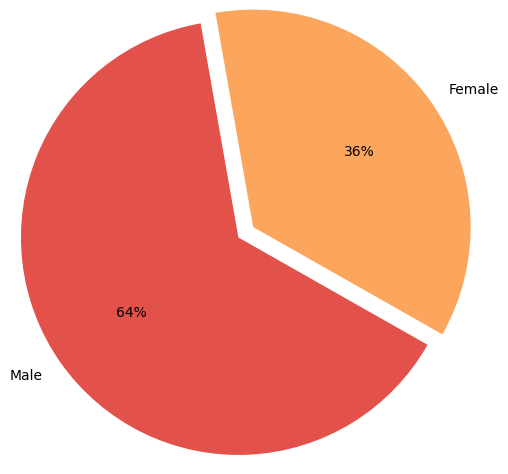

In [131]:
from matplotlib.pyplot import figure
figure(figsize=(6, 6), dpi=100)
values = [931918,524013]
labeles = ['Male','Female']
colors = sns.color_palette('Spectral')[0:5]
plt.pie(values, labels = labeles, colors = colors, autopct='%.0f%%',radius=1.2,explode=[0,0.1],startangle=100)
plt.show()# to get rid of these extra lables

* all colors available here
https://seaborn.pydata.org/tutorial/color_palettes.html
* all pie arguments are available here 
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pie.html

In [132]:
64/36

1.7777777777777777

#### !!!! on average Men are 1.7 times suicidal than females

* -----------------------------------------Year on year number of suicides

In [133]:
m = state_and_UT_data[state_and_UT_data['Type_code']=='Social_Status' ].groupby(['Year']).Total.sum()
m

Year
2001    108506.0
2002    110417.0
2003    110851.0
2004    113697.0
2005    113914.0
2006    118112.0
2007    122637.0
2008    125017.0
2009    127151.0
2010    134599.0
2011    135585.0
2012    135445.0
Name: Total, dtype: float64

In [134]:
m =list(m)

In [135]:
m

[108506.0,
 110417.0,
 110851.0,
 113697.0,
 113914.0,
 118112.0,
 122637.0,
 125017.0,
 127151.0,
 134599.0,
 135585.0,
 135445.0]

In [136]:
years

[2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012]

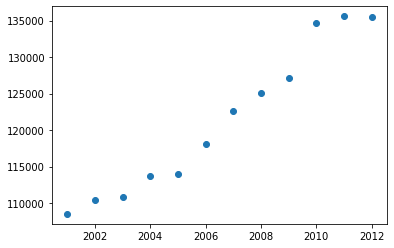

In [137]:
plt.scatter(years,m)

#### !!!! Year on Year there is continious increase in number of suicides, except for 2012

* -------------------------------------------Overall average suicide per 1,00,000 people in 2001 -VS- 2011

* Since census data is for 2001 & 2011, we will see % of populaiton, suicidng 
* 2011 population = 1,210,854,977
* 2001 population = 1,028,737,436

In [138]:
print('Suicide rate per 1000 people in 2011 - ' ,round((135585/1210854977)*100000,1))

Suicide rate per 1000 people in 2011 -  11.2


In [139]:
print('Suicide rate per 1000 people in 2001 - ' ,round((108506/1028737436)*100000,1))
#108506*100/1028737436

Suicide rate per 1000 people in 2001 -  10.5


#### !!!  suicide rate per 1,00,000 has increased form (10.5 in 2001) to (11.2 in 2011)

* ----------------------------------------State wise average suicides per 1,00,000 populaiton

##### Choropleth map used
* of average suicide in states over years Divided by average population of that state
* Average population of each (state/UT) = (2001+2011)/2
* Average suicides of each (state/UT) = ( 2001-data + 2002-data + 2003-data + ... 2012-data )/12
* Index-of-comparision = (Average suicides of each state / Average population of each state)

In [140]:
state_and_UT_list = state_list + UT_list
len(state_and_UT_list)

36

In [141]:
l=[]
for j in state_and_UT_list:
    s = 0
    for i in years:
        s = s + state_and_UT_data[(state_and_UT_data['State']==j)&(state_and_UT_data['Year']==i)&(state_and_UT_data['Type_code']=='Social_Status')].Total.sum()
    s = s/12
    l = l+[[j,round(s,3)]]
l

[['ANDHRA PRADESH', 6784.167],
 ['ARUNACHAL PRADESH', 110.667],
 ['ASSAM', 2872.417],
 ['BIHAR', 770.417],
 ['CHHATTISGARH', 5041.25],
 ['GOA', 289.583],
 ['GUJARAT', 5514.75],
 ['HARYANA', 2453.083],
 ['HIMACHAL PRADESH', 443.25],
 ['JAMMU & KASHMIR', 247.333],
 ['JHARKHAND', 829.167],
 ['KARNATAKA', 12247.083],
 ['KERALA', 8994.667],
 ['MADHYA PRADESH', 7525.583],
 ['MAHARASHTRA', 15032.417],
 ['MANIPUR', 35.083],
 ['MEGHALAYA', 90.5],
 ['MIZORAM', 69.5],
 ['NAGALAND', 28.917],
 ['ODISHA', 4454.0],
 ['PUNJAB', 772.5],
 ['RAJASTHAN', 4252.25],
 ['SIKKIM', 160.333],
 ['TAMIL NADU', 13651.083],
 ['TRIPURA', 766.167],
 ['UTTAR PRADESH', 3890.0],
 ['UTTARAKHAND', 308.5],
 ['WEST BENGAL', 14665.583],
 ['TELANGANA', 6784.167],
 ['A & N ISLANDS', 135.25],
 ['CHANDIGARH', 86.167],
 ['D & N HAVELI', 57.167],
 ['DAMAN & DIU', 23.25],
 ['DELHI (UT)', 1404.75],
 ['LAKSHADWEEP', 0.833],
 ['PUDUCHERRY', 535.75]]

In [142]:
len(l)

36

* L contains data of location with average of their suicides in 12 Years

In [143]:
# ['state' , (2011 + 2001)/2 ]
m = [['ANDHRA PRADESH', (84580777+75728000)/4],
 ['ARUNACHAL PRADESH', (1383727+1091000)/2],
 ['ASSAM', (31205576+26638000)/2],
 ['BIHAR', (104099452+82879000)/2],
 ['CHHATTISGARH', (25545198+20796000)/2],
 ['GOA', (1458545+1344000)/2],
 ['GUJARAT', (60439692+50597000)/2],
 ['HARYANA', (25351462+21083000)/2],
 ['HIMACHAL PRADESH', (6864602+6077000)/2],
 ['JAMMU & KASHMIR', (12541302+10070000)/2],
 ['JHARKHAND', (32988134+26909000)/2],
 ['KARNATAKA', (61095297+52734000)/2],
 ['KERALA', (33406061+31839000)/2],
 ['MADHYA PRADESH', (72626809+60385000)/2],
 ['MAHARASHTRA', (112374333+96752000 )/2],
 ['MANIPUR', (2721756+2389000)/2],
 ['MEGHALAYA', (2966889+2306000)/2],
 ['MIZORAM', (1097206+891000)/2],
 ['NAGALAND', (1978502+1989000)/2],
 ['ODISHA', (41974218+36707000)/2],
 ['PUNJAB', (27743338+24289000)/2],
 ['RAJASTHAN', (68548437+56473000)/2],
 ['SIKKIM', (610577+540000)/2],
 ['TAMIL NADU', (72147030+62111000)/2],
 ['TRIPURA', (3673917+3191000)/2],
 ['UTTAR PRADESH', (199812341 + 166053000)/2],
 ['UTTARAKHAND', (10086292+8480000)/2],
 ['WEST BENGAL', (91276115+80221000)/2],
 ['TELANGANA', (84580777+75728000)/4],
 ['A & N ISLANDS', (380581+356000)/2],
 ['CHANDIGARH', (1055450+901000)/2],
 ['D & N HAVELI', (343709+220000)/2],
 ['DAMAN & DIU', (243247+158000)/2],
 ['DELHI (UT)', (16787941+13783000)/2],
 ['LAKSHADWEEP', (64473+61000)/2],
 ['PUDUCHERRY', (1247953+974000)/2]]

In [144]:
m

[['ANDHRA PRADESH', 40077194.25],
 ['ARUNACHAL PRADESH', 1237363.5],
 ['ASSAM', 28921788.0],
 ['BIHAR', 93489226.0],
 ['CHHATTISGARH', 23170599.0],
 ['GOA', 1401272.5],
 ['GUJARAT', 55518346.0],
 ['HARYANA', 23217231.0],
 ['HIMACHAL PRADESH', 6470801.0],
 ['JAMMU & KASHMIR', 11305651.0],
 ['JHARKHAND', 29948567.0],
 ['KARNATAKA', 56914648.5],
 ['KERALA', 32622530.5],
 ['MADHYA PRADESH', 66505904.5],
 ['MAHARASHTRA', 104563166.5],
 ['MANIPUR', 2555378.0],
 ['MEGHALAYA', 2636444.5],
 ['MIZORAM', 994103.0],
 ['NAGALAND', 1983751.0],
 ['ODISHA', 39340609.0],
 ['PUNJAB', 26016169.0],
 ['RAJASTHAN', 62510718.5],
 ['SIKKIM', 575288.5],
 ['TAMIL NADU', 67129015.0],
 ['TRIPURA', 3432458.5],
 ['UTTAR PRADESH', 182932670.5],
 ['UTTARAKHAND', 9283146.0],
 ['WEST BENGAL', 85748557.5],
 ['TELANGANA', 40077194.25],
 ['A & N ISLANDS', 368290.5],
 ['CHANDIGARH', 978225.0],
 ['D & N HAVELI', 281854.5],
 ['DAMAN & DIU', 200623.5],
 ['DELHI (UT)', 15285470.5],
 ['LAKSHADWEEP', 62736.5],
 ['PUDUCHERRY', 11

In [145]:
m[0][1]

40077194.25

* m contains list of states with their average population 
* now creating list containing states's suicide per 1,00,000 people

In [146]:
l[0][1]

6784.167

In [147]:
m[0][1]

40077194.25

In [148]:
(l[0][1])/ (m[0][1])

0.00016927749377066236

In [149]:
n = []
for i in range(36):
    n.append((float(l[i][1])/float(m[i][1]))*100000)

In [150]:
n

[16.927749377066235,
 8.943774404207009,
 9.931671582683615,
 0.8240703586528785,
 21.757098295128234,
 20.665716339969563,
 9.933202981227144,
 10.565786247291935,
 6.8500020322059045,
 2.1876935702331517,
 2.768636642948559,
 21.51833196334332,
 27.57194755324085,
 11.315661453788662,
 14.376398021572921,
 1.3729084307683637,
 3.432653332926219,
 6.991227267194647,
 1.457693026997844,
 11.321634598996676,
 2.9693072796382896,
 6.8024334098799395,
 27.870016522144976,
 20.335592589880847,
 22.32123126907434,
 2.12646543089743,
 3.323226845726653,
 17.103008409208517,
 16.927749377066235,
 36.72372760090201,
 8.80850520074625,
 20.282450697079522,
 11.588871692498635,
 9.190099840237172,
 1.327775696763447,
 48.223342257914545]

In [151]:
state_and_UT_list

['ANDHRA PRADESH',
 'ARUNACHAL PRADESH',
 'ASSAM',
 'BIHAR',
 'CHHATTISGARH',
 'GOA',
 'GUJARAT',
 'HARYANA',
 'HIMACHAL PRADESH',
 'JAMMU & KASHMIR',
 'JHARKHAND',
 'KARNATAKA',
 'KERALA',
 'MADHYA PRADESH',
 'MAHARASHTRA',
 'MANIPUR',
 'MEGHALAYA',
 'MIZORAM',
 'NAGALAND',
 'ODISHA',
 'PUNJAB',
 'RAJASTHAN',
 'SIKKIM',
 'TAMIL NADU',
 'TRIPURA',
 'UTTAR PRADESH',
 'UTTARAKHAND',
 'WEST BENGAL',
 'TELANGANA',
 'A & N ISLANDS',
 'CHANDIGARH',
 'D & N HAVELI',
 'DAMAN & DIU',
 'DELHI (UT)',
 'LAKSHADWEEP',
 'PUDUCHERRY']

In [152]:
data =[['location','avg']]
for i in range(36):
    data.append([state_and_UT_list[i],n[i]])

In [153]:
len(data)

37

* creating csv file to store this data

In [154]:
import csv
with open('test.csv','w',newline='') as fp:
    # fp. truncate(0)
    a = csv.writer(fp,delimiter=',')
    a.writerows(data)

* Downloading this csv file & creating map in Tableau

#### !!!! Tableau graph shows , south indian are more suicidal
* can also be done with GeoJson in python, but easier on Tableau

##### GeoJSON
* An open standard format designed for representing simple geographical features, along with their non-spatial features
* Downloaded json file of indian maps from https://un-mapped.carto.com/tables/states_india/public/map
##### Mapbox
* An open source mapping platform for custom designed map

* -----------------------------Over all years added, distrbution of suicided into Different Type_codes in Males vs Female

#### Type_codes == 'Causes' , 'Male'

*  in total suicides among 'Male' which was major cause ?

In [155]:
state_and_UT_data.head()

,State,Year,Type_code,Type,Gender,Age_group,Total
4993,ANDHRA PRADESH,2001,Causes,Death of Dear Person,Male,0-14,0.0
4994,ANDHRA PRADESH,2001,Causes,Fall in Social Reputation,Female,60+,0.5
4995,ANDHRA PRADESH,2001,Causes,Insanity/Mental Illness,Female,15-29,56.0
4996,ANDHRA PRADESH,2001,Causes,Other Causes,Male,30-44,146.5
4997,ANDHRA PRADESH,2001,Education_Status,Diploma,Male,0-100+,37.5


In [156]:
t = state_and_UT_data[state_and_UT_data['Type_code']=='Causes'].Type.unique()
len(t)

25

In [157]:
o = []
for i in t:
    o.append(state_and_UT_data[(state_and_UT_data['Gender']=='Male')&(state_and_UT_data['Type_code']=='Causes')&(state_and_UT_data['Type']==i)].Total.sum())

In [158]:
len(o)

25

In [159]:
o

[5614.0,
 8767.0,
 60877.0,
 304985.0,
 5831.0,
 2521.0,
 125493.0,
 5002.0,
 14051.0,
 6818.0,
 23617.0,
 103.0,
 6180.0,
 14951.0,
 10958.0,
 31175.0,
 28841.0,
 208771.0,
 1330.0,
 24779.0,
 1598.0,
 5170.0,
 23700.0,
 764.0,
 1342.0]

<BarContainer object of 25 artists>

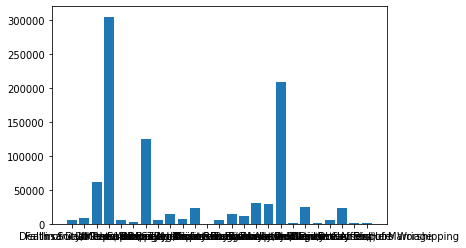

In [160]:
plt.bar(t,o)

* Graphs shows, it to have few most contributing cases, and remaining less contribution 

In [161]:
sum = 0
for i in o:
    sum = sum+i
sum

923238.0

In [162]:
p=[]
for i in range(25):
    p.append([t[i],round((o[i]*100/sum),2)])
p

[['Death of Dear Person', 0.61],
 ['Fall in Social Reputation', 0.95],
 ['Insanity/Mental Illness', 6.59],
 ['Other Causes', 33.03],
 ['Illness (Aids/STD)', 0.63],
 ['Impotency', 0.27],
 ['Other Prolonged Illness', 13.59],
 ['Paralysis', 0.54],
 ['Property Dispute', 1.52],
 ['Suspected/Illicit Relation', 0.74],
 ['Unemployment', 2.56],
 ['Illegitimate Pregnancy', 0.01],
 ['Cancer', 0.67],
 ['Failure in Examination', 1.62],
 ['Professional/Career Problem', 1.19],
 ['Bankruptcy', 3.38],
 ['Drug Abuse/Addiction', 3.12],
 ['Family Problems', 22.61],
 ['Physical Abuse (Rape/Incest Etc.)', 0.14],
 ['Poverty', 2.68],
 ['Divorce', 0.17],
 ['Cancellation/Non-Settlement of Marriage', 0.56],
 ['Love Affairs', 2.57],
 ['Dowry Dispute', 0.08],
 ['Ideological Causes/Hero Worshipping', 0.15]]

In [163]:
# checking out causes contribution for 'Male' suicides
for i in range(25):
    if p[i][1]>5:
        print(p[i])

['Insanity/Mental Illness', 6.59]
['Other Causes', 33.03]
['Other Prolonged Illness', 13.59]
['Family Problems', 22.61]


* 'Other Causes', 33 %
* 'Family Problems', 22.61 %
* 'Other Prolonged Illness', 13.59 %

#### !!!! Difficult to make solid conclusions, as 33 % are 'Other Causes'
* But 'Family Problems' & 'Other Prolonged Illness' caused 36.3 % of male suicides
* Looking for yearly trends in these two causes

In [164]:
years

[2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012]

* -------------'Family Problems'

In [165]:
t=[]
for i in years:
    t.append(state_and_UT_data[(state_and_UT_data['Gender']=='Male')&(state_and_UT_data['Type_code']=='Causes')&(state_and_UT_data['Type']=='Family Problems')&(state_and_UT_data['Year']==i)].Total.sum())

In [166]:
t

[13899.0,
 14752.0,
 15778.0,
 15324.0,
 15357.0,
 18672.0,
 18336.0,
 18502.0,
 18441.0,
 19828.0,
 20345.0,
 19537.0]

Text(0, 0.5, 'Number of suicides')

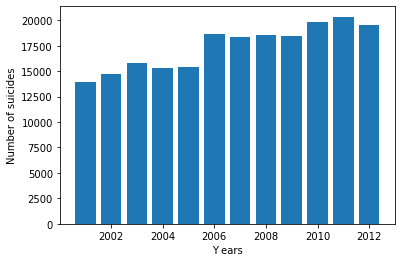

In [167]:
plt.bar(years,t)
plt.xlabel('Y ears')
plt.ylabel('Number of suicides')

* Male suicides due to 'Family Problems' is increasing year on year

* It'scontribution in per 1,00,000 suicides as a part of total population in 2001 VS 2011

In [168]:
# 2001
(13899.0/1028737436)*100000

1.3510736086404072

In [169]:
# 2011
(20345.0/1210854977)*100000

1.6802177293276301

In [170]:
((1.68-1.35)/1.35)*100

24.444444444444432

In [330]:
state_and_UT_list

['ANDHRA PRADESH',
 'ARUNACHAL PRADESH',
 'ASSAM',
 'BIHAR',
 'CHHATTISGARH',
 'GOA',
 'GUJARAT',
 'HARYANA',
 'HIMACHAL PRADESH',
 'JAMMU & KASHMIR',
 'JHARKHAND',
 'KARNATAKA',
 'KERALA',
 'MADHYA PRADESH',
 'MAHARASHTRA',
 'MANIPUR',
 'MEGHALAYA',
 'MIZORAM',
 'NAGALAND',
 'ODISHA',
 'PUNJAB',
 'RAJASTHAN',
 'SIKKIM',
 'TAMIL NADU',
 'TRIPURA',
 'UTTAR PRADESH',
 'UTTARAKHAND',
 'WEST BENGAL',
 'TELANGANA',
 'A & N ISLANDS',
 'CHANDIGARH',
 'D & N HAVELI',
 'DAMAN & DIU',
 'DELHI (UT)',
 'LAKSHADWEEP',
 'PUDUCHERRY']

In [337]:
t =[]
for i in state_and_UT_list:
    k = state_and_UT_data[(state_and_UT_data['Type_code']=='Causes')&(state_and_UT_data['Type']=='Family Problems')&(state_and_UT_data['Gender']=='Male')&(state_and_UT_data['State']==i)].Total.sum()
    t.append([i,k])    
t

[['ANDHRA PRADESH', 10041.5],
 ['ARUNACHAL PRADESH', 56.0],
 ['ASSAM', 2911.0],
 ['BIHAR', 996.0],
 ['CHHATTISGARH', 4886.0],
 ['GOA', 274.0],
 ['GUJARAT', 6634.0],
 ['HARYANA', 3430.0],
 ['HIMACHAL PRADESH', 644.0],
 ['JAMMU & KASHMIR', 180.0],
 ['JHARKHAND', 614.0],
 ['KARNATAKA', 15272.0],
 ['KERALA', 26558.0],
 ['MADHYA PRADESH', 9881.0],
 ['MAHARASHTRA', 39208.0],
 ['MANIPUR', 4.0],
 ['MEGHALAYA', 118.0],
 ['MIZORAM', 30.0],
 ['NAGALAND', 18.0],
 ['ODISHA', 6777.0],
 ['PUNJAB', 1006.0],
 ['RAJASTHAN', 6844.0],
 ['SIKKIM', 142.0],
 ['TAMIL NADU', 29761.0],
 ['TRIPURA', 1586.0],
 ['UTTAR PRADESH', 5363.0],
 ['UTTARAKHAND', 453.0],
 ['WEST BENGAL', 20424.0],
 ['TELANGANA', 10041.5],
 ['A & N ISLANDS', 51.0],
 ['CHANDIGARH', 161.0],
 ['D & N HAVELI', 83.0],
 ['DAMAN & DIU', 9.0],
 ['DELHI (UT)', 2463.0],
 ['LAKSHADWEEP', 0.0],
 ['PUDUCHERRY', 1851.0]]

In [338]:
sum = 0
for i in t:
    sum = sum + i[1]
sum

208771.0

In [339]:
len(t)

36

In [340]:
for i in range(36):
    t[i][1] = round((t[i][1])*100/sum,2)
t

[['ANDHRA PRADESH', 4.81],
 ['ARUNACHAL PRADESH', 0.03],
 ['ASSAM', 1.39],
 ['BIHAR', 0.48],
 ['CHHATTISGARH', 2.34],
 ['GOA', 0.13],
 ['GUJARAT', 3.18],
 ['HARYANA', 1.64],
 ['HIMACHAL PRADESH', 0.31],
 ['JAMMU & KASHMIR', 0.09],
 ['JHARKHAND', 0.29],
 ['KARNATAKA', 7.32],
 ['KERALA', 12.72],
 ['MADHYA PRADESH', 4.73],
 ['MAHARASHTRA', 18.78],
 ['MANIPUR', 0.0],
 ['MEGHALAYA', 0.06],
 ['MIZORAM', 0.01],
 ['NAGALAND', 0.01],
 ['ODISHA', 3.25],
 ['PUNJAB', 0.48],
 ['RAJASTHAN', 3.28],
 ['SIKKIM', 0.07],
 ['TAMIL NADU', 14.26],
 ['TRIPURA', 0.76],
 ['UTTAR PRADESH', 2.57],
 ['UTTARAKHAND', 0.22],
 ['WEST BENGAL', 9.78],
 ['TELANGANA', 4.81],
 ['A & N ISLANDS', 0.02],
 ['CHANDIGARH', 0.08],
 ['D & N HAVELI', 0.04],
 ['DAMAN & DIU', 0.0],
 ['DELHI (UT)', 1.18],
 ['LAKSHADWEEP', 0.0],
 ['PUDUCHERRY', 0.89]]

In [343]:
for i in range(36):
    if t[i][1]>5:
        print(t[i])

['KARNATAKA', 7.32]
['KERALA', 12.72]
['MAHARASHTRA', 18.78]
['TAMIL NADU', 14.26]
['WEST BENGAL', 9.78]


##### --------these are states for major contributor in 'family problems' related suicides in Males


#### !!!! there was a 24% increase in 'Male' suicide ( by 'Family Problems' per 1,00,000 population ) from 2001 to 2011

* -------------'Other Prolonged Illness'

In [171]:
t=[]
for i in years:
    t.append(state_and_UT_data[(state_and_UT_data['Gender']=='Male')&(state_and_UT_data['Type_code']=='Causes')&(state_and_UT_data['Type']=='Other Prolonged Illness')&(state_and_UT_data['Year']==i)].Total.sum())

In [172]:
t

[10245.0,
 11372.0,
 10028.0,
 10585.0,
 9485.0,
 10546.0,
 10600.0,
 10746.0,
 10371.0,
 11071.0,
 10357.0,
 10087.0]

Text(0, 0.5, 'Number of suicides')

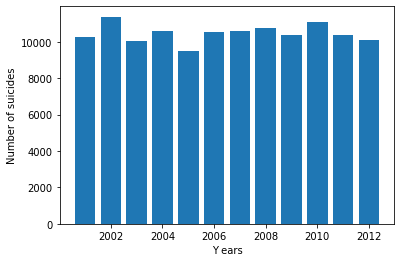

In [173]:
plt.bar(years,t)
plt.xlabel('Y ears')
plt.ylabel('Number of suicides')

* It's going no-where

#### 'Male' suicides due to 'Other Prolonged Illness' remained stable year on year

In [344]:
state_and_UT_list

['ANDHRA PRADESH',
 'ARUNACHAL PRADESH',
 'ASSAM',
 'BIHAR',
 'CHHATTISGARH',
 'GOA',
 'GUJARAT',
 'HARYANA',
 'HIMACHAL PRADESH',
 'JAMMU & KASHMIR',
 'JHARKHAND',
 'KARNATAKA',
 'KERALA',
 'MADHYA PRADESH',
 'MAHARASHTRA',
 'MANIPUR',
 'MEGHALAYA',
 'MIZORAM',
 'NAGALAND',
 'ODISHA',
 'PUNJAB',
 'RAJASTHAN',
 'SIKKIM',
 'TAMIL NADU',
 'TRIPURA',
 'UTTAR PRADESH',
 'UTTARAKHAND',
 'WEST BENGAL',
 'TELANGANA',
 'A & N ISLANDS',
 'CHANDIGARH',
 'D & N HAVELI',
 'DAMAN & DIU',
 'DELHI (UT)',
 'LAKSHADWEEP',
 'PUDUCHERRY']

In [345]:
t =[]
for i in state_and_UT_list:
    k = state_and_UT_data[(state_and_UT_data['Type_code']=='Causes')&(state_and_UT_data['Type']=='Other Prolonged Illness')&(state_and_UT_data['Gender']=='Male')&(state_and_UT_data['State']==i)].Total.sum()
    t.append([i,k])    
t

[['ANDHRA PRADESH', 10397.5],
 ['ARUNACHAL PRADESH', 26.0],
 ['ASSAM', 1373.0],
 ['BIHAR', 277.0],
 ['CHHATTISGARH', 4422.0],
 ['GOA', 200.0],
 ['GUJARAT', 4815.0],
 ['HARYANA', 1478.0],
 ['HIMACHAL PRADESH', 254.0],
 ['JAMMU & KASHMIR', 105.0],
 ['JHARKHAND', 161.0],
 ['KARNATAKA', 20034.0],
 ['KERALA', 10352.0],
 ['MADHYA PRADESH', 5717.0],
 ['MAHARASHTRA', 23031.0],
 ['MANIPUR', 0.0],
 ['MEGHALAYA', 46.0],
 ['MIZORAM', 1.0],
 ['NAGALAND', 4.0],
 ['ODISHA', 1021.0],
 ['PUNJAB', 524.0],
 ['RAJASTHAN', 2264.0],
 ['SIKKIM', 61.0],
 ['TAMIL NADU', 19834.0],
 ['TRIPURA', 265.0],
 ['UTTAR PRADESH', 2022.0],
 ['UTTARAKHAND', 119.0],
 ['WEST BENGAL', 4315.0],
 ['TELANGANA', 10397.5],
 ['A & N ISLANDS', 215.0],
 ['CHANDIGARH', 46.0],
 ['D & N HAVELI', 39.0],
 ['DAMAN & DIU', 9.0],
 ['DELHI (UT)', 641.0],
 ['LAKSHADWEEP', 2.0],
 ['PUDUCHERRY', 1025.0]]

In [346]:
sum = 0
for i in t:
    sum = sum + i[1]
sum

125493.0

In [347]:
len(t)

36

In [348]:
for i in range(36):
    t[i][1] = round((t[i][1])*100/sum,2)
t

[['ANDHRA PRADESH', 8.29],
 ['ARUNACHAL PRADESH', 0.02],
 ['ASSAM', 1.09],
 ['BIHAR', 0.22],
 ['CHHATTISGARH', 3.52],
 ['GOA', 0.16],
 ['GUJARAT', 3.84],
 ['HARYANA', 1.18],
 ['HIMACHAL PRADESH', 0.2],
 ['JAMMU & KASHMIR', 0.08],
 ['JHARKHAND', 0.13],
 ['KARNATAKA', 15.96],
 ['KERALA', 8.25],
 ['MADHYA PRADESH', 4.56],
 ['MAHARASHTRA', 18.35],
 ['MANIPUR', 0.0],
 ['MEGHALAYA', 0.04],
 ['MIZORAM', 0.0],
 ['NAGALAND', 0.0],
 ['ODISHA', 0.81],
 ['PUNJAB', 0.42],
 ['RAJASTHAN', 1.8],
 ['SIKKIM', 0.05],
 ['TAMIL NADU', 15.8],
 ['TRIPURA', 0.21],
 ['UTTAR PRADESH', 1.61],
 ['UTTARAKHAND', 0.09],
 ['WEST BENGAL', 3.44],
 ['TELANGANA', 8.29],
 ['A & N ISLANDS', 0.17],
 ['CHANDIGARH', 0.04],
 ['D & N HAVELI', 0.03],
 ['DAMAN & DIU', 0.01],
 ['DELHI (UT)', 0.51],
 ['LAKSHADWEEP', 0.0],
 ['PUDUCHERRY', 0.82]]

In [349]:
for i in range(36):
    if t[i][1]>5:
        print(t[i])

['ANDHRA PRADESH', 8.29]
['KARNATAKA', 15.96]
['KERALA', 8.25]
['MAHARASHTRA', 18.35]
['TAMIL NADU', 15.8]
['TELANGANA', 8.29]


##### --------these are states for major contributor in 'Other Prolonged Illness' related suicides in Males
* A research can be held, to know cause of such prolonged illness in these states

#### !!!! so, in case of Male 'Suicides' , 'Family Problems' contributed 22.61 % of total suicides from (2001-2012) AND this problem is increasing at alarming rate.
#### !!!! also  'Other Prolonged Illness' remains 2nd known major cause contributing 13.59 % of total suicides & this problem is neither increasing nor decreasing.

#### Type_codes == 'Causes' , 'Female'

In [174]:
state_and_UT_data.head()

,State,Year,Type_code,Type,Gender,Age_group,Total
4993,ANDHRA PRADESH,2001,Causes,Death of Dear Person,Male,0-14,0.0
4994,ANDHRA PRADESH,2001,Causes,Fall in Social Reputation,Female,60+,0.5
4995,ANDHRA PRADESH,2001,Causes,Insanity/Mental Illness,Female,15-29,56.0
4996,ANDHRA PRADESH,2001,Causes,Other Causes,Male,30-44,146.5
4997,ANDHRA PRADESH,2001,Education_Status,Diploma,Male,0-100+,37.5


In [175]:
t = state_and_UT_data[state_and_UT_data['Type_code']=='Causes'].Type.unique()
len(t)

25

In [176]:
o = []
for i in t:
    o.append(state_and_UT_data[(state_and_UT_data['Gender']=='Female')&(state_and_UT_data['Type_code']=='Causes')&(state_and_UT_data['Type']==i)].Total.sum())

In [177]:
len(o)

25

In [178]:
o

[4707.0,
 4697.0,
 33352.0,
 148134.0,
 2892.0,
 6067.0,
 69072.0,
 2284.0,
 4601.0,
 8093.0,
 3748.0,
 2391.0,
 2878.0,
 12054.0,
 1596.0,
 4235.0,
 1205.0,
 133181.0,
 2662.0,
 7905.0,
 2535.0,
 6126.0,
 21339.0,
 31206.0,
 776.0]

<BarContainer object of 25 artists>

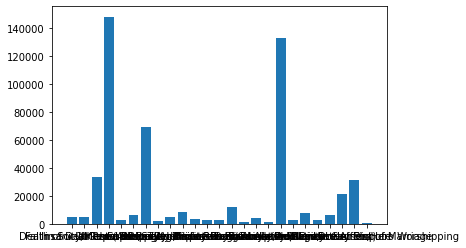

In [179]:
plt.bar(t,o)

* Graphs shows, it to have few most contributing cases, and remaining less contribution 

In [180]:
sum = 0
for i in o:
    sum = sum+i
sum

517736.0

In [181]:
p=[]
for i in range(25):
    p.append([t[i],round((o[i]*100/sum),2)])
p

[['Death of Dear Person', 0.91],
 ['Fall in Social Reputation', 0.91],
 ['Insanity/Mental Illness', 6.44],
 ['Other Causes', 28.61],
 ['Illness (Aids/STD)', 0.56],
 ['Impotency', 1.17],
 ['Other Prolonged Illness', 13.34],
 ['Paralysis', 0.44],
 ['Property Dispute', 0.89],
 ['Suspected/Illicit Relation', 1.56],
 ['Unemployment', 0.72],
 ['Illegitimate Pregnancy', 0.46],
 ['Cancer', 0.56],
 ['Failure in Examination', 2.33],
 ['Professional/Career Problem', 0.31],
 ['Bankruptcy', 0.82],
 ['Drug Abuse/Addiction', 0.23],
 ['Family Problems', 25.72],
 ['Physical Abuse (Rape/Incest Etc.)', 0.51],
 ['Poverty', 1.53],
 ['Divorce', 0.49],
 ['Cancellation/Non-Settlement of Marriage', 1.18],
 ['Love Affairs', 4.12],
 ['Dowry Dispute', 6.03],
 ['Ideological Causes/Hero Worshipping', 0.15]]

In [182]:
# checking out causes contribution for 'Female' suicides
for i in range(25):
    if p[i][1]>5:
        print(p[i])

['Insanity/Mental Illness', 6.44]
['Other Causes', 28.61]
['Other Prolonged Illness', 13.34]
['Family Problems', 25.72]
['Dowry Dispute', 6.03]


* 'Other Causes', 28.61 %
* 'Family Problems', 25.72 %
* 'Other Prolonged Illness', 13.34%

#### !!!! Difficult to make solid conclusions, as 28.61 % are 'Other Causes'
* But 'Family Problems' & 'Other Prolonged Illness' caused 39.06 % of male suicides
* Looking for yearly trends in these two causes

In [183]:
years

[2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012]

* -------------'Family Problems'

In [184]:
t=[]
for i in years:
    t.append(state_and_UT_data[(state_and_UT_data['Gender']=='Female')&(state_and_UT_data['Type_code']=='Causes')&(state_and_UT_data['Type']=='Family Problems')&(state_and_UT_data['Year']==i)].Total.sum())

In [185]:
t

[10263.0,
 10333.0,
 10530.0,
 10207.0,
 10084.0,
 12099.0,
 10902.0,
 11275.0,
 11641.0,
 12028.0,
 12564.0,
 11255.0]

Text(0, 0.5, 'Number of suicides')

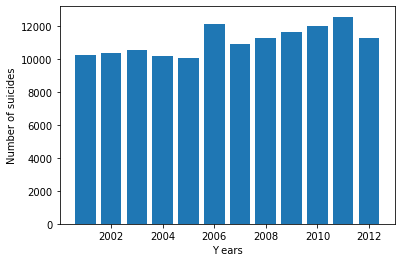

In [186]:
plt.bar(years,t)
plt.xlabel('Y ears')
plt.ylabel('Number of suicides')

* Female suicides due to 'Family Problems' is increasing year on year

* It's contribution in per 1,00,00 suicides in 2001 VS 2011

In [187]:
# 2001
(10263.0/1028737436)*100000

0.9976306529589538

In [188]:
# 2011
(12564.0/1210854977)*100000

1.0376139371478175

In [189]:
((1.0376139371478175-0.9976306529589538)/0.9976306529589538)*100

4.007824345640742

* 4% increase is not significant

In [350]:
state_and_UT_list

['ANDHRA PRADESH',
 'ARUNACHAL PRADESH',
 'ASSAM',
 'BIHAR',
 'CHHATTISGARH',
 'GOA',
 'GUJARAT',
 'HARYANA',
 'HIMACHAL PRADESH',
 'JAMMU & KASHMIR',
 'JHARKHAND',
 'KARNATAKA',
 'KERALA',
 'MADHYA PRADESH',
 'MAHARASHTRA',
 'MANIPUR',
 'MEGHALAYA',
 'MIZORAM',
 'NAGALAND',
 'ODISHA',
 'PUNJAB',
 'RAJASTHAN',
 'SIKKIM',
 'TAMIL NADU',
 'TRIPURA',
 'UTTAR PRADESH',
 'UTTARAKHAND',
 'WEST BENGAL',
 'TELANGANA',
 'A & N ISLANDS',
 'CHANDIGARH',
 'D & N HAVELI',
 'DAMAN & DIU',
 'DELHI (UT)',
 'LAKSHADWEEP',
 'PUDUCHERRY']

In [357]:
t =[]
for i in state_and_UT_list:
    k = state_and_UT_data[(state_and_UT_data['Type_code']=='Causes')&(state_and_UT_data['Type']=='Family Problems')&(state_and_UT_data['Gender']=='Female')&(state_and_UT_data['State']==i)].Total.sum()
    t.append([i,k])     
t

[['ANDHRA PRADESH', 5306.5],
 ['ARUNACHAL PRADESH', 40.0],
 ['ASSAM', 1401.0],
 ['BIHAR', 828.0],
 ['CHHATTISGARH', 3180.0],
 ['GOA', 196.0],
 ['GUJARAT', 6423.0],
 ['HARYANA', 1615.0],
 ['HIMACHAL PRADESH', 500.0],
 ['JAMMU & KASHMIR', 246.0],
 ['JHARKHAND', 532.0],
 ['KARNATAKA', 8770.0],
 ['KERALA', 9769.0],
 ['MADHYA PRADESH', 8400.0],
 ['MAHARASHTRA', 26133.0],
 ['MANIPUR', 22.0],
 ['MEGHALAYA', 62.0],
 ['MIZORAM', 2.0],
 ['NAGALAND', 8.0],
 ['ODISHA', 5147.0],
 ['PUNJAB', 500.0],
 ['RAJASTHAN', 4586.0],
 ['SIKKIM', 92.0],
 ['TAMIL NADU', 19902.0],
 ['TRIPURA', 1157.0],
 ['UTTAR PRADESH', 4370.0],
 ['UTTARAKHAND', 409.0],
 ['WEST BENGAL', 15461.0],
 ['TELANGANA', 5306.5],
 ['A & N ISLANDS', 48.0],
 ['CHANDIGARH', 142.0],
 ['D & N HAVELI', 104.0],
 ['DAMAN & DIU', 7.0],
 ['DELHI (UT)', 1642.0],
 ['LAKSHADWEEP', 1.0],
 ['PUDUCHERRY', 873.0]]

In [358]:
sum = 0
for i in t:
    sum = sum + i[1]
sum

133181.0

In [359]:
for i in range(36):
    t[i][1] = round((t[i][1])*100/sum,2)
t

[['ANDHRA PRADESH', 3.98],
 ['ARUNACHAL PRADESH', 0.03],
 ['ASSAM', 1.05],
 ['BIHAR', 0.62],
 ['CHHATTISGARH', 2.39],
 ['GOA', 0.15],
 ['GUJARAT', 4.82],
 ['HARYANA', 1.21],
 ['HIMACHAL PRADESH', 0.38],
 ['JAMMU & KASHMIR', 0.18],
 ['JHARKHAND', 0.4],
 ['KARNATAKA', 6.59],
 ['KERALA', 7.34],
 ['MADHYA PRADESH', 6.31],
 ['MAHARASHTRA', 19.62],
 ['MANIPUR', 0.02],
 ['MEGHALAYA', 0.05],
 ['MIZORAM', 0.0],
 ['NAGALAND', 0.01],
 ['ODISHA', 3.86],
 ['PUNJAB', 0.38],
 ['RAJASTHAN', 3.44],
 ['SIKKIM', 0.07],
 ['TAMIL NADU', 14.94],
 ['TRIPURA', 0.87],
 ['UTTAR PRADESH', 3.28],
 ['UTTARAKHAND', 0.31],
 ['WEST BENGAL', 11.61],
 ['TELANGANA', 3.98],
 ['A & N ISLANDS', 0.04],
 ['CHANDIGARH', 0.11],
 ['D & N HAVELI', 0.08],
 ['DAMAN & DIU', 0.01],
 ['DELHI (UT)', 1.23],
 ['LAKSHADWEEP', 0.0],
 ['PUDUCHERRY', 0.66]]

In [360]:
for i in range(36):
    if t[i][1]>5:
        print(t[i])

['KARNATAKA', 6.59]
['KERALA', 7.34]
['MADHYA PRADESH', 6.31]
['MAHARASHTRA', 19.62]
['TAMIL NADU', 14.94]
['WEST BENGAL', 11.61]


* These are states where we have major 'Female' suicides due to Family problems

* -------------'Other Prolonged Illness'

In [190]:
t=[]
for i in years:
    t.append(state_and_UT_data[(state_and_UT_data['Gender']=='Female')&(state_and_UT_data['Type_code']=='Causes')&(state_and_UT_data['Type']=='Other Prolonged Illness')&(state_and_UT_data['Year']==i)].Total.sum())

In [191]:
t

[5702.0,
 5924.0,
 5608.0,
 5756.0,
 5335.0,
 5951.0,
 5852.0,
 5905.0,
 5657.0,
 5973.0,
 5797.0,
 5612.0]

Text(0, 0.5, 'Number of suicides')

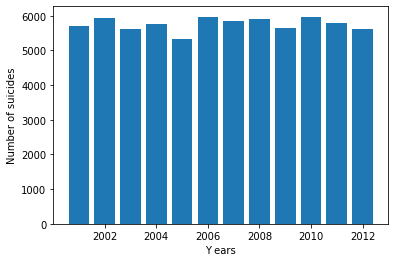

In [192]:
plt.bar(years,t)
plt.xlabel('Y ears')
plt.ylabel('Number of suicides')

#### 'Female' suicides due to 'Other Prolonged Illness' remained stable year on year

In [361]:
state_and_UT_list

['ANDHRA PRADESH',
 'ARUNACHAL PRADESH',
 'ASSAM',
 'BIHAR',
 'CHHATTISGARH',
 'GOA',
 'GUJARAT',
 'HARYANA',
 'HIMACHAL PRADESH',
 'JAMMU & KASHMIR',
 'JHARKHAND',
 'KARNATAKA',
 'KERALA',
 'MADHYA PRADESH',
 'MAHARASHTRA',
 'MANIPUR',
 'MEGHALAYA',
 'MIZORAM',
 'NAGALAND',
 'ODISHA',
 'PUNJAB',
 'RAJASTHAN',
 'SIKKIM',
 'TAMIL NADU',
 'TRIPURA',
 'UTTAR PRADESH',
 'UTTARAKHAND',
 'WEST BENGAL',
 'TELANGANA',
 'A & N ISLANDS',
 'CHANDIGARH',
 'D & N HAVELI',
 'DAMAN & DIU',
 'DELHI (UT)',
 'LAKSHADWEEP',
 'PUDUCHERRY']

In [362]:
t =[]
for i in state_and_UT_list:
    k = state_and_UT_data[(state_and_UT_data['Type_code']=='Causes')&(state_and_UT_data['Type']=='Other Prolonged Illness')&(state_and_UT_data['Gender']=='Female')&(state_and_UT_data['State']==i)].Total.sum()
    t.append([i,k])     
t

[['ANDHRA PRADESH', 6520.5],
 ['ARUNACHAL PRADESH', 2.0],
 ['ASSAM', 580.0],
 ['BIHAR', 128.0],
 ['CHHATTISGARH', 2154.0],
 ['GOA', 100.0],
 ['GUJARAT', 3537.0],
 ['HARYANA', 447.0],
 ['HIMACHAL PRADESH', 109.0],
 ['JAMMU & KASHMIR', 43.0],
 ['JHARKHAND', 48.0],
 ['KARNATAKA', 11591.0],
 ['KERALA', 4288.0],
 ['MADHYA PRADESH', 3663.0],
 ['MAHARASHTRA', 10777.0],
 ['MANIPUR', 0.0],
 ['MEGHALAYA', 10.0],
 ['MIZORAM', 0.0],
 ['NAGALAND', 2.0],
 ['ODISHA', 663.0],
 ['PUNJAB', 130.0],
 ['RAJASTHAN', 1037.0],
 ['SIKKIM', 23.0],
 ['TAMIL NADU', 11470.0],
 ['TRIPURA', 105.0],
 ['UTTAR PRADESH', 1205.0],
 ['UTTARAKHAND', 66.0],
 ['WEST BENGAL', 2730.0],
 ['TELANGANA', 6520.5],
 ['A & N ISLANDS', 126.0],
 ['CHANDIGARH', 24.0],
 ['D & N HAVELI', 20.0],
 ['DAMAN & DIU', 1.0],
 ['DELHI (UT)', 286.0],
 ['LAKSHADWEEP', 0.0],
 ['PUDUCHERRY', 666.0]]

In [363]:
sum = 0
for i in t:
    sum = sum + i[1]
sum

69072.0

In [364]:
for i in range(36):
    t[i][1] = round((t[i][1])*100/sum,2)
t

[['ANDHRA PRADESH', 9.44],
 ['ARUNACHAL PRADESH', 0.0],
 ['ASSAM', 0.84],
 ['BIHAR', 0.19],
 ['CHHATTISGARH', 3.12],
 ['GOA', 0.14],
 ['GUJARAT', 5.12],
 ['HARYANA', 0.65],
 ['HIMACHAL PRADESH', 0.16],
 ['JAMMU & KASHMIR', 0.06],
 ['JHARKHAND', 0.07],
 ['KARNATAKA', 16.78],
 ['KERALA', 6.21],
 ['MADHYA PRADESH', 5.3],
 ['MAHARASHTRA', 15.6],
 ['MANIPUR', 0.0],
 ['MEGHALAYA', 0.01],
 ['MIZORAM', 0.0],
 ['NAGALAND', 0.0],
 ['ODISHA', 0.96],
 ['PUNJAB', 0.19],
 ['RAJASTHAN', 1.5],
 ['SIKKIM', 0.03],
 ['TAMIL NADU', 16.61],
 ['TRIPURA', 0.15],
 ['UTTAR PRADESH', 1.74],
 ['UTTARAKHAND', 0.1],
 ['WEST BENGAL', 3.95],
 ['TELANGANA', 9.44],
 ['A & N ISLANDS', 0.18],
 ['CHANDIGARH', 0.03],
 ['D & N HAVELI', 0.03],
 ['DAMAN & DIU', 0.0],
 ['DELHI (UT)', 0.41],
 ['LAKSHADWEEP', 0.0],
 ['PUDUCHERRY', 0.96]]

In [365]:
for i in range(36):
    if t[i][1]>5:
        print(t[i])

['ANDHRA PRADESH', 9.44]
['GUJARAT', 5.12]
['KARNATAKA', 16.78]
['KERALA', 6.21]
['MADHYA PRADESH', 5.3]
['MAHARASHTRA', 15.6]
['TAMIL NADU', 16.61]
['TELANGANA', 9.44]


* These are states where we have major 'Female' suicides due to 'Other prolonged illness'

#### Overall for both Male-Female  'Family Problems' & 'Other Prolonged Illness' are two known major causes of SUicides
* This indicates towards, need of serious family welfare management programes by government.
* Also awareness about such 'Prolonged Illness' should be done before hand, to prevent people getting such desieses.

* Have to check weather this data is varying state-wise or not.

In [196]:
f.Type_code.unique()

array(['Causes', 'Means_adopted', 'Professional_Profile',
       'Education_Status', 'Social_Status'], dtype=object)

#### Type_codes == 'Means_adopted' , 'Male'

*  in total suicides among 'Male' which was major  'Means_adopted' ?

In [197]:
state_and_UT_data.head()

,State,Year,Type_code,Type,Gender,Age_group,Total
4993,ANDHRA PRADESH,2001,Causes,Death of Dear Person,Male,0-14,0.0
4994,ANDHRA PRADESH,2001,Causes,Fall in Social Reputation,Female,60+,0.5
4995,ANDHRA PRADESH,2001,Causes,Insanity/Mental Illness,Female,15-29,56.0
4996,ANDHRA PRADESH,2001,Causes,Other Causes,Male,30-44,146.5
4997,ANDHRA PRADESH,2001,Education_Status,Diploma,Male,0-100+,37.5


In [198]:
t = state_and_UT_data[state_and_UT_data['Type_code']=='Means_adopted'].Type.unique()
len(t)

16

In [200]:
o = []
for i in t:
    o.append(state_and_UT_data[(state_and_UT_data['Gender']=='Male')&(state_and_UT_data['Type_code']=='Means_adopted')&(state_and_UT_data['Type']==i)].Total.sum())

In [201]:
len(o)

16

In [202]:
o

[180785.0,
 4690.0,
 312532.0,
 5517.0,
 5629.0,
 35933.0,
 147540.0,
 43667.0,
 6290.0,
 1437.0,
 14816.0,
 58406.0,
 8628.0,
 3518.0,
 96578.0,
 5952.0]

<BarContainer object of 16 artists>

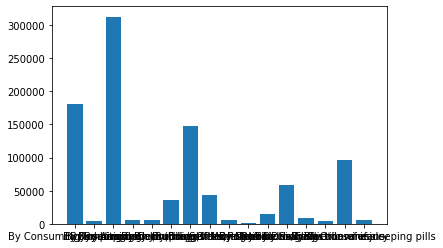

In [203]:
plt.bar(t,o)

* Graphs shows, it to have few most contributing cases, and remaining less contribution 

In [205]:
sum = 0
for i in o:
    sum = sum+i
sum

931918.0

In [207]:
p=[]
for i in range(16):
    p.append([t[i],round((o[i]*100/sum),2)])
p

[['By Consuming Insecticides', 19.4],
 ['By Fire-Arms', 0.5],
 ['By Hanging', 33.54],
 ['By Jumping from (Building)', 0.59],
 ['By Jumping from (Other sites)', 0.6],
 ['By coming under running vehicles/trains', 3.86],
 ['By Consuming Other Poison', 15.83],
 ['By Fire/Self Immolation', 4.69],
 ['By Jumping off Moving Vehicles/Trains', 0.67],
 ['By Machine', 0.15],
 ['By Over Alcoholism', 1.59],
 ['By Drowning', 6.27],
 ['By touching electric wires', 0.93],
 ['By Self Infliction of injury', 0.38],
 ['By Other means', 10.36],
 ['By Overdose of sleeping pills', 0.64]]

In [209]:
# checking out causes contribution for 'Male' suicides
for i in range(16):
    if p[i][1]>5:
        print(p[i])

['By Consuming Insecticides', 19.4]
['By Hanging', 33.54]
['By Consuming Other Poison', 15.83]
['By Drowning', 6.27]
['By Other means', 10.36]


* 'By Hanging'   33.54 %
* 'By Consuming Insecticides'  19.4 %
* 'By Consuming Other Poison'  15.83 %
* 'By Other means'   10.36 %
* 'By Drowning'  6.27 %

* looking for yearly trends in these causes

In [210]:
years

[2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012]

* -------------'By Hanging'

In [213]:
t=[]
for i in years:
    t.append(state_and_UT_data[(state_and_UT_data['Gender']=='Male')&(state_and_UT_data['Type_code']=='Means_adopted')&(state_and_UT_data['Type']=='By Hanging')&(state_and_UT_data['Year']==i)].Total.sum())

In [214]:
t

[19668.0,
 21276.0,
 21966.0,
 24020.0,
 24786.0,
 25610.0,
 26509.0,
 27332.0,
 27079.0,
 28988.0,
 30667.0,
 34631.0]

Text(0, 0.5, 'Number of suicides')

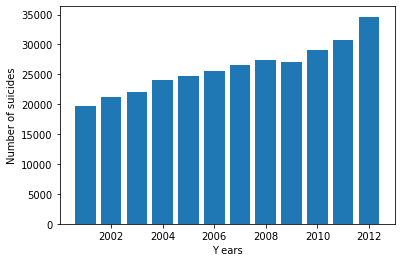

In [215]:
plt.bar(years,t)
plt.xlabel('Y ears')
plt.ylabel('Number of suicides')

* Male suicides 'By Hanging' is increasing year on year
* There is no way government can controll, this way to suicide

* ---------------------'By Consuming Insecticides'

In [218]:
t=[]
for i in years:
    t.append(state_and_UT_data[(state_and_UT_data['Gender']=='Male')&(state_and_UT_data['Type_code']=='Means_adopted')&(state_and_UT_data['Type']=='By Consuming Insecticides')&(state_and_UT_data['Year']==i)].Total.sum())

In [219]:
t

[13487.0,
 13716.0,
 15145.0,
 15210.0,
 14516.0,
 15398.0,
 15876.0,
 15766.0,
 17176.0,
 16822.0,
 14512.0,
 13161.0]

Text(0, 0.5, 'Number of suicides')

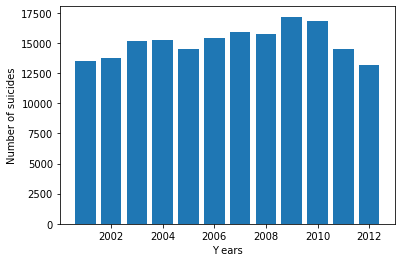

In [220]:
plt.bar(years,t)
plt.xlabel('Y ears')
plt.ylabel('Number of suicides')

In [367]:
state_and_UT_list

['ANDHRA PRADESH',
 'ARUNACHAL PRADESH',
 'ASSAM',
 'BIHAR',
 'CHHATTISGARH',
 'GOA',
 'GUJARAT',
 'HARYANA',
 'HIMACHAL PRADESH',
 'JAMMU & KASHMIR',
 'JHARKHAND',
 'KARNATAKA',
 'KERALA',
 'MADHYA PRADESH',
 'MAHARASHTRA',
 'MANIPUR',
 'MEGHALAYA',
 'MIZORAM',
 'NAGALAND',
 'ODISHA',
 'PUNJAB',
 'RAJASTHAN',
 'SIKKIM',
 'TAMIL NADU',
 'TRIPURA',
 'UTTAR PRADESH',
 'UTTARAKHAND',
 'WEST BENGAL',
 'TELANGANA',
 'A & N ISLANDS',
 'CHANDIGARH',
 'D & N HAVELI',
 'DAMAN & DIU',
 'DELHI (UT)',
 'LAKSHADWEEP',
 'PUDUCHERRY']

In [368]:
t =[]
for i in state_and_UT_list:
    k = state_and_UT_data[(state_and_UT_data['Type_code']=='Means_adopted')&(state_and_UT_data['Type']=='By Consuming Insecticides')&(state_and_UT_data['Gender']=='Male')&(state_and_UT_data['State']==i)].Total.sum()
    t.append([i,k])     
t

[['ANDHRA PRADESH', 18809.5],
 ['ARUNACHAL PRADESH', 10.0],
 ['ASSAM', 270.0],
 ['BIHAR', 678.0],
 ['CHHATTISGARH', 7631.0],
 ['GOA', 84.0],
 ['GUJARAT', 9907.0],
 ['HARYANA', 2414.0],
 ['HIMACHAL PRADESH', 588.0],
 ['JAMMU & KASHMIR', 133.0],
 ['JHARKHAND', 644.0],
 ['KARNATAKA', 9727.0],
 ['KERALA', 14262.0],
 ['MADHYA PRADESH', 11839.0],
 ['MAHARASHTRA', 39813.0],
 ['MANIPUR', 7.0],
 ['MEGHALAYA', 8.0],
 ['MIZORAM', 1.0],
 ['NAGALAND', 1.0],
 ['ODISHA', 6943.0],
 ['PUNJAB', 625.0],
 ['RAJASTHAN', 5431.0],
 ['SIKKIM', 18.0],
 ['TAMIL NADU', 15637.0],
 ['TRIPURA', 693.0],
 ['UTTAR PRADESH', 2955.0],
 ['UTTARAKHAND', 498.0],
 ['WEST BENGAL', 11231.0],
 ['TELANGANA', 18809.5],
 ['A & N ISLANDS', 29.0],
 ['CHANDIGARH', 11.0],
 ['D & N HAVELI', 13.0],
 ['DAMAN & DIU', 6.0],
 ['DELHI (UT)', 469.0],
 ['LAKSHADWEEP', 0.0],
 ['PUDUCHERRY', 590.0]]

In [371]:
sum = 0
for i in t:
    sum = sum + i[1]
sum

180785.0

In [372]:
for i in range(36):
    t[i][1] = round((t[i][1])*100/sum,2)
t

[['ANDHRA PRADESH', 10.4],
 ['ARUNACHAL PRADESH', 0.01],
 ['ASSAM', 0.15],
 ['BIHAR', 0.38],
 ['CHHATTISGARH', 4.22],
 ['GOA', 0.05],
 ['GUJARAT', 5.48],
 ['HARYANA', 1.34],
 ['HIMACHAL PRADESH', 0.33],
 ['JAMMU & KASHMIR', 0.07],
 ['JHARKHAND', 0.36],
 ['KARNATAKA', 5.38],
 ['KERALA', 7.89],
 ['MADHYA PRADESH', 6.55],
 ['MAHARASHTRA', 22.02],
 ['MANIPUR', 0.0],
 ['MEGHALAYA', 0.0],
 ['MIZORAM', 0.0],
 ['NAGALAND', 0.0],
 ['ODISHA', 3.84],
 ['PUNJAB', 0.35],
 ['RAJASTHAN', 3.0],
 ['SIKKIM', 0.01],
 ['TAMIL NADU', 8.65],
 ['TRIPURA', 0.38],
 ['UTTAR PRADESH', 1.63],
 ['UTTARAKHAND', 0.28],
 ['WEST BENGAL', 6.21],
 ['TELANGANA', 10.4],
 ['A & N ISLANDS', 0.02],
 ['CHANDIGARH', 0.01],
 ['D & N HAVELI', 0.01],
 ['DAMAN & DIU', 0.0],
 ['DELHI (UT)', 0.26],
 ['LAKSHADWEEP', 0.0],
 ['PUDUCHERRY', 0.33]]

In [373]:
for i in range(36):
    if t[i][1]>5:
        print(t[i])

['ANDHRA PRADESH', 10.4]
['GUJARAT', 5.48]
['KARNATAKA', 5.38]
['KERALA', 7.89]
['MADHYA PRADESH', 6.55]
['MAHARASHTRA', 22.02]
['TAMIL NADU', 8.65]
['WEST BENGAL', 6.21]
['TELANGANA', 10.4]


* These are states where male suicides are by consuming 'By Consuming Insecticides'

* Male suicides 'By Consuming Insecticides' is nearly stable
* Government can reduce it, by allowing only farmers to buy INsecticides, using their farmer card

* -------------------'By Consuming Other Poison'

In [221]:
t=[]
for i in years:
    t.append(state_and_UT_data[(state_and_UT_data['Gender']=='Male')&(state_and_UT_data['Type_code']=='Means_adopted')&(state_and_UT_data['Type']=='By Consuming Other Poison')&(state_and_UT_data['Year']==i)].Total.sum())

In [222]:
t

[12577.0,
 12485.0,
 12456.0,
 12108.0,
 12194.0,
 12274.0,
 12101.0,
 12322.0,
 10608.0,
 12440.0,
 13689.0,
 12286.0]

Text(0, 0.5, 'Number of suicides')

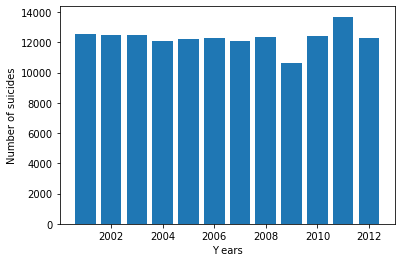

In [224]:
plt.bar(years,t)
plt.xlabel('Y ears')
plt.ylabel('Number of suicides')

In [374]:
state_and_UT_list

['ANDHRA PRADESH',
 'ARUNACHAL PRADESH',
 'ASSAM',
 'BIHAR',
 'CHHATTISGARH',
 'GOA',
 'GUJARAT',
 'HARYANA',
 'HIMACHAL PRADESH',
 'JAMMU & KASHMIR',
 'JHARKHAND',
 'KARNATAKA',
 'KERALA',
 'MADHYA PRADESH',
 'MAHARASHTRA',
 'MANIPUR',
 'MEGHALAYA',
 'MIZORAM',
 'NAGALAND',
 'ODISHA',
 'PUNJAB',
 'RAJASTHAN',
 'SIKKIM',
 'TAMIL NADU',
 'TRIPURA',
 'UTTAR PRADESH',
 'UTTARAKHAND',
 'WEST BENGAL',
 'TELANGANA',
 'A & N ISLANDS',
 'CHANDIGARH',
 'D & N HAVELI',
 'DAMAN & DIU',
 'DELHI (UT)',
 'LAKSHADWEEP',
 'PUDUCHERRY']

In [375]:
t =[]
for i in state_and_UT_list:
    k = state_and_UT_data[(state_and_UT_data['Type_code']=='Means_adopted')&(state_and_UT_data['Type']=='By Consuming Other Poison')&(state_and_UT_data['Gender']=='Male')&(state_and_UT_data['State']==i)].Total.sum()
    t.append([i,k])     
t

[['ANDHRA PRADESH', 7878.0],
 ['ARUNACHAL PRADESH', 35.0],
 ['ASSAM', 3700.0],
 ['BIHAR', 681.0],
 ['CHHATTISGARH', 3079.0],
 ['GOA', 186.0],
 ['GUJARAT', 7024.0],
 ['HARYANA', 3760.0],
 ['HIMACHAL PRADESH', 1025.0],
 ['JAMMU & KASHMIR', 262.0],
 ['JHARKHAND', 396.0],
 ['KARNATAKA', 25321.0],
 ['KERALA', 13336.0],
 ['MADHYA PRADESH', 4071.0],
 ['MAHARASHTRA', 8929.0],
 ['MANIPUR', 43.0],
 ['MEGHALAYA', 13.0],
 ['MIZORAM', 0.0],
 ['NAGALAND', 9.0],
 ['ODISHA', 4386.0],
 ['PUNJAB', 466.0],
 ['RAJASTHAN', 2884.0],
 ['SIKKIM', 15.0],
 ['TAMIL NADU', 23627.0],
 ['TRIPURA', 1343.0],
 ['UTTAR PRADESH', 2615.0],
 ['UTTARAKHAND', 288.0],
 ['WEST BENGAL', 22316.0],
 ['TELANGANA', 7878.0],
 ['A & N ISLANDS', 75.0],
 ['CHANDIGARH', 116.0],
 ['D & N HAVELI', 57.0],
 ['DAMAN & DIU', 24.0],
 ['DELHI (UT)', 1426.0],
 ['LAKSHADWEEP', 0.0],
 ['PUDUCHERRY', 276.0]]

In [376]:
sum = 0
for i in t:
    sum = sum + i[1]
sum

147540.0

In [377]:
for i in range(36):
    t[i][1] = round((t[i][1])*100/sum,2)
t

[['ANDHRA PRADESH', 5.34],
 ['ARUNACHAL PRADESH', 0.02],
 ['ASSAM', 2.51],
 ['BIHAR', 0.46],
 ['CHHATTISGARH', 2.09],
 ['GOA', 0.13],
 ['GUJARAT', 4.76],
 ['HARYANA', 2.55],
 ['HIMACHAL PRADESH', 0.69],
 ['JAMMU & KASHMIR', 0.18],
 ['JHARKHAND', 0.27],
 ['KARNATAKA', 17.16],
 ['KERALA', 9.04],
 ['MADHYA PRADESH', 2.76],
 ['MAHARASHTRA', 6.05],
 ['MANIPUR', 0.03],
 ['MEGHALAYA', 0.01],
 ['MIZORAM', 0.0],
 ['NAGALAND', 0.01],
 ['ODISHA', 2.97],
 ['PUNJAB', 0.32],
 ['RAJASTHAN', 1.95],
 ['SIKKIM', 0.01],
 ['TAMIL NADU', 16.01],
 ['TRIPURA', 0.91],
 ['UTTAR PRADESH', 1.77],
 ['UTTARAKHAND', 0.2],
 ['WEST BENGAL', 15.13],
 ['TELANGANA', 5.34],
 ['A & N ISLANDS', 0.05],
 ['CHANDIGARH', 0.08],
 ['D & N HAVELI', 0.04],
 ['DAMAN & DIU', 0.02],
 ['DELHI (UT)', 0.97],
 ['LAKSHADWEEP', 0.0],
 ['PUDUCHERRY', 0.19]]

In [378]:
for i in range(36):
    if t[i][1]>5:
        print(t[i])

['ANDHRA PRADESH', 5.34]
['KARNATAKA', 17.16]
['KERALA', 9.04]
['MAHARASHTRA', 6.05]
['TAMIL NADU', 16.01]
['WEST BENGAL', 15.13]
['TELANGANA', 5.34]


In [ ]:
* These are states where man are suiciding by consuming poision, govt. need to cross-check their strivtness regarding poision selling

SyntaxError: invalid syntax (1144045352.py, line 1)

* Male suicides 'By Consuming Other Poison' is nearly stable
* Government can reduce it, by stricting selling of such poisions, in presence of ID cards & Statement of Purpose

* --------------------'By Drowning'

In [225]:
t=[]
for i in years:
    t.append(state_and_UT_data[(state_and_UT_data['Gender']=='Male')&(state_and_UT_data['Type_code']=='Means_adopted')&(state_and_UT_data['Type']=='By Drowning')&(state_and_UT_data['Year']==i)].Total.sum())

In [226]:
t

[4695.0,
 4621.0,
 4820.0,
 4171.0,
 4555.0,
 5215.0,
 5202.0,
 5190.0,
 4794.0,
 5142.0,
 5007.0,
 4994.0]

Text(0, 0.5, 'Number of suicides')

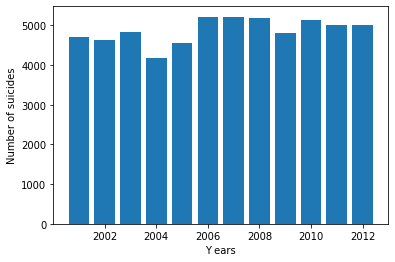

In [227]:
plt.bar(years,t)
plt.xlabel('Y ears')
plt.ylabel('Number of suicides')

* Male suicides 'By Drowning' is nearly stable
* Government can't controll it

* Have to check weather this data is varying state-wise or not.

#### Type_codes == 'Means_adopted' , 'Female'

*  in total suicides among 'Female' which was major  'Means_adopted' ?

In [229]:
state_and_UT_data.head()

,State,Year,Type_code,Type,Gender,Age_group,Total
4993,ANDHRA PRADESH,2001,Causes,Death of Dear Person,Male,0-14,0.0
4994,ANDHRA PRADESH,2001,Causes,Fall in Social Reputation,Female,60+,0.5
4995,ANDHRA PRADESH,2001,Causes,Insanity/Mental Illness,Female,15-29,56.0
4996,ANDHRA PRADESH,2001,Causes,Other Causes,Male,30-44,146.5
4997,ANDHRA PRADESH,2001,Education_Status,Diploma,Male,0-100+,37.5


In [230]:
t = state_and_UT_data[state_and_UT_data['Type_code']=='Means_adopted'].Type.unique()
len(t)

16

In [231]:
o = []
for i in t:
    o.append(state_and_UT_data[(state_and_UT_data['Gender']=='Female')&(state_and_UT_data['Type_code']=='Means_adopted')&(state_and_UT_data['Type']==i)].Total.sum())

In [233]:
o

[94716.0,
 1604.0,
 148423.0,
 2354.0,
 2498.0,
 9366.0,
 83638.0,
 84339.0,
 1826.0,
 224.0,
 1157.0,
 38305.0,
 2188.0,
 1575.0,
 47792.0,
 4008.0]

<BarContainer object of 16 artists>

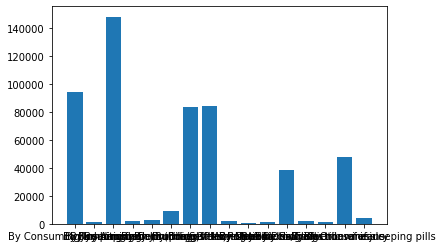

In [234]:
plt.bar(t,o)

In [235]:
sum = 0
for i in o:
    sum = sum+i
sum

524013.0

In [236]:
p=[]
for i in range(16):
    p.append([t[i],round((o[i]*100/sum),2)])
p

[['By Consuming Insecticides', 18.08],
 ['By Fire-Arms', 0.31],
 ['By Hanging', 28.32],
 ['By Jumping from (Building)', 0.45],
 ['By Jumping from (Other sites)', 0.48],
 ['By coming under running vehicles/trains', 1.79],
 ['By Consuming Other Poison', 15.96],
 ['By Fire/Self Immolation', 16.09],
 ['By Jumping off Moving Vehicles/Trains', 0.35],
 ['By Machine', 0.04],
 ['By Over Alcoholism', 0.22],
 ['By Drowning', 7.31],
 ['By touching electric wires', 0.42],
 ['By Self Infliction of injury', 0.3],
 ['By Other means', 9.12],
 ['By Overdose of sleeping pills', 0.76]]

In [237]:
# checking out causes contribution for 'Male' suicides
for i in range(16):
    if p[i][1]>5:
        print(p[i])

['By Consuming Insecticides', 18.08]
['By Hanging', 28.32]
['By Consuming Other Poison', 15.96]
['By Fire/Self Immolation', 16.09]
['By Drowning', 7.31]
['By Other means', 9.12]


* 'By Hanging' 28.32 % 
* 'By Consuming Insecticides'   18.08 %
* 'By Fire/Self Immolation', 16.09 %
* 'By Consuming Other Poison', 15.96 %
* 'By Drowning', 7.31 % 
* 'By Other means', 9.12 %

In [239]:
29.32+18.08+16.09+15.96+8+9

96.44999999999999

#### !!!! One confusion, why 'By Fire/Self Immolation' is famous among females, & not males ?
* other contrivutions, are similar to that of males.
* checking annual increase in these causes.

* ------------------'By Consuming Insecticides'

In [240]:
t=[]
for i in years:
    t.append(state_and_UT_data[(state_and_UT_data['Gender']=='Female')&(state_and_UT_data['Type_code']=='Means_adopted')&(state_and_UT_data['Type']=='By Consuming Insecticides')&(state_and_UT_data['Year']==i)].Total.sum())

In [241]:
t

[8043.0,
 7698.0,
 7856.0,
 8101.0,
 7800.0,
 7549.0,
 8249.0,
 8129.0,
 8765.0,
 8466.0,
 7292.0,
 6768.0]

Text(0, 0.5, 'Number of suicides')

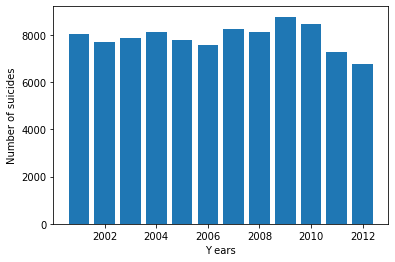

In [243]:
plt.bar(years,t)
plt.xlabel('Y ears')
plt.ylabel('Number of suicides')

* ---------------------------------'By Fire/Self Immolation',

In [244]:
t=[]
for i in years:
    t.append(state_and_UT_data[(state_and_UT_data['Gender']=='Female')&(state_and_UT_data['Type_code']=='Means_adopted')&(state_and_UT_data['Type']=='By Fire/Self Immolation')&(state_and_UT_data['Year']==i)].Total.sum())

Text(0, 0.5, 'Number of suicides')

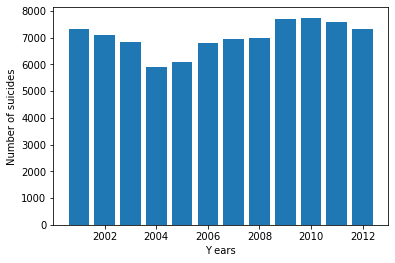

In [245]:
plt.bar(years,t)
plt.xlabel('Y ears')
plt.ylabel('Number of suicides')

* ---------------------'By Consuming Other Poison'

In [246]:
t=[]
for i in years:
    t.append(state_and_UT_data[(state_and_UT_data['Gender']=='Female')&(state_and_UT_data['Type_code']=='Means_adopted')&(state_and_UT_data['Type']=='By Consuming Other Poison')&(state_and_UT_data['Year']==i)].Total.sum())

Text(0, 0.5, 'Number of suicides')

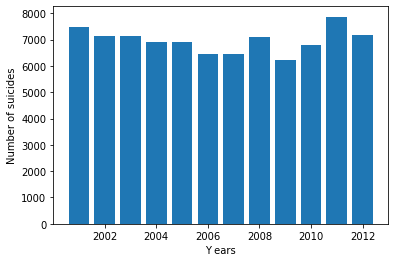

In [248]:
plt.bar(years,t)
plt.xlabel('Y ears')
plt.ylabel('Number of suicides')

* No trends found in these.
* Have to look at their states, scatter , to let govt. know where to focus to.

#### Type_codes == 'Education_Status' , 'Male'

*  in total suicides among 'Male' what is 'Education_Status' distribution  ?

In [262]:
state_and_UT_data.head()

,State,Year,Type_code,Type,Gender,Age_group,Total
4993,ANDHRA PRADESH,2001,Causes,Death of Dear Person,Male,0-14,0.0
4994,ANDHRA PRADESH,2001,Causes,Fall in Social Reputation,Female,60+,0.5
4995,ANDHRA PRADESH,2001,Causes,Insanity/Mental Illness,Female,15-29,56.0
4996,ANDHRA PRADESH,2001,Causes,Other Causes,Male,30-44,146.5
4997,ANDHRA PRADESH,2001,Education_Status,Diploma,Male,0-100+,37.5


In [251]:
t = state_and_UT_data[state_and_UT_data['Type_code']=='Education_Status'].Type.unique()
len(t)

8

In [253]:
o = []
for i in t:
    o.append(state_and_UT_data[(state_and_UT_data['Gender']=='Male')&(state_and_UT_data['Type_code']=='Education_Status')&(state_and_UT_data['Type']==i)].Total.sum())

In [254]:
o

[10419.0, 188815.0, 226487.0, 5271.0, 174626.0, 225208.0, 79502.0, 21590.0]

<BarContainer object of 8 artists>

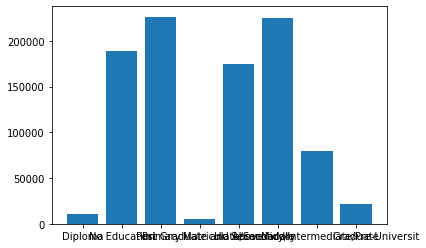

In [255]:
plt.bar(t,o)

In [256]:
sum = 0
for i in o:
    sum = sum+i
sum

931918.0

In [258]:
p=[]
for i in range(8):
    p.append([t[i],round((o[i]*100/sum),2)])
p

[['Diploma', 1.12],
 ['No Education', 20.26],
 ['Primary', 24.3],
 ['Post Graduate and Above', 0.57],
 ['Matriculate/Secondary', 18.74],
 ['Middle', 24.17],
 ['Hr. Secondary/Intermediate/Pre-Universit', 8.53],
 ['Graduate', 2.32]]

In [260]:
# checking out causes contribution for 'Male' suicides
for i in range(8):
    if p[i][1]>5:
        print(p[i])

['No Education', 20.26]
['Primary', 24.3]
['Matriculate/Secondary', 18.74]
['Middle', 24.17]
['Hr. Secondary/Intermediate/Pre-Universit', 8.53]


* 'No Education'  20.26 %
* 'Primary'  24.3 %
* 'Middle', 24.17 %
* 'Matriculate/Secondary', 18.74 %
* 'Hr. Secondary/Intermediate/Pre-Universit', 8.53 %

* With education suicide contribution is decreasing.
#### But, to see real distribution , we need number of 'Males' in each education bracket. And then see % of those suiciding.
* In the 2011 Census, about 73% of the population was literate, with 81% for males and 65% for females. ( BUT their definition of literate is different. than what we require )

#### Type_codes == 'Education_Status' , 'Female'

*  in total suicides among 'Female' what is 'Education_Status' distribution  ?

In [272]:
state_and_UT_data.head()

,State,Year,Type_code,Type,Gender,Age_group,Total
4993,ANDHRA PRADESH,2001,Causes,Death of Dear Person,Male,0-14,0.0
4994,ANDHRA PRADESH,2001,Causes,Fall in Social Reputation,Female,60+,0.5
4995,ANDHRA PRADESH,2001,Causes,Insanity/Mental Illness,Female,15-29,56.0
4996,ANDHRA PRADESH,2001,Causes,Other Causes,Male,30-44,146.5
4997,ANDHRA PRADESH,2001,Education_Status,Diploma,Male,0-100+,37.5


In [264]:
t = state_and_UT_data[state_and_UT_data['Type_code']=='Education_Status'].Type.unique()
len(t)

8

In [265]:
o = []
for i in t:
    o.append(state_and_UT_data[(state_and_UT_data['Gender']=='Female')&(state_and_UT_data['Type_code']=='Education_Status')&(state_and_UT_data['Type']==i)].Total.sum())

In [266]:
o

[3734.0, 132942.0, 136340.0, 2204.0, 81940.0, 117763.0, 39406.0, 9684.0]

<BarContainer object of 8 artists>

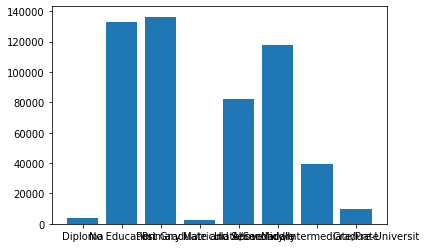

In [267]:
plt.bar(t,o)

In [268]:
sum = 0
for i in o:
    sum = sum+i
sum

524013.0

In [269]:
p=[]
for i in range(8):
    p.append([t[i],round((o[i]*100/sum),2)])
p

[['Diploma', 0.71],
 ['No Education', 25.37],
 ['Primary', 26.02],
 ['Post Graduate and Above', 0.42],
 ['Matriculate/Secondary', 15.64],
 ['Middle', 22.47],
 ['Hr. Secondary/Intermediate/Pre-Universit', 7.52],
 ['Graduate', 1.85]]

In [270]:
# checking out causes contribution for 'Male' suicides
for i in range(8):
    if p[i][1]>5:
        print(p[i])

['No Education', 25.37]
['Primary', 26.02]
['Matriculate/Secondary', 15.64]
['Middle', 22.47]
['Hr. Secondary/Intermediate/Pre-Universit', 7.52]


* A similar trend is observed in Females, as education increases, it's contribution decreases in suicides
#### But, to see real distribution , we need number of 'Males' in each education bracket. And then see % of those suiciding.

#### Type_codes == 'Professional_Profile' , 'Male'

In [273]:
t = state_and_UT_data[state_and_UT_data['Type_code']=='Professional_Profile'].Type.unique()
len(t)

11

In [274]:
o = []
for i in t:
    o.append(state_and_UT_data[(state_and_UT_data['Gender']=='Male')&(state_and_UT_data['Type_code']=='Professional_Profile')&(state_and_UT_data['Type']==i)].Total.sum())

In [275]:
o

[25256.0,
 19094.0,
 93829.0,
 0.0,
 72323.0,
 96850.0,
 357956.0,
 35587.0,
 9647.0,
 170623.0,
 40931.0]

<BarContainer object of 11 artists>

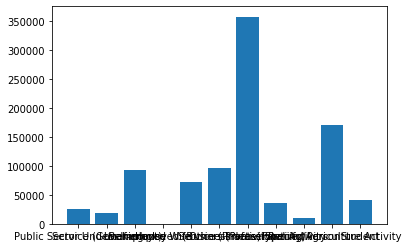

In [276]:
plt.bar(t,o)

In [277]:
sum = 0
for i in o:
    sum = sum+i
sum

922096.0

In [278]:
p=[]
for i in range(8):
    p.append([t[i],round((o[i]*100/sum),2)])
p

[['Public Sector Undertaking', 2.74],
 ['Service (Government)', 2.07],
 ['Unemployed', 10.18],
 ['House Wife', 0.0],
 ['Self-employed (Business activity)', 7.84],
 ['Service (Private)', 10.5],
 ['Others (Please Specify)', 38.82],
 ['Professional Activity', 3.86]]

In [279]:
# checking out causes contribution for 'Male' suicides
for i in range(8):
    if p[i][1]>5:
        print(p[i])

['Unemployed', 10.18]
['Self-employed (Business activity)', 7.84]
['Service (Private)', 10.5]
['Others (Please Specify)', 38.82]


#### !!!! Difficult to make solid conclusions, as 33 % are 'Other Causes'
* But 'Unemployed' & 'Service (Private)' & 'Self-employed (Business activity)' caused 28.52 % of male suicides
* Looking for yearly trends in these two causes

In [281]:
10.18 + 7.84 + 10.5

28.52

* ------------------------'Unemployed'

In [284]:
t=[]
for i in years:
    t.append(state_and_UT_data[(state_and_UT_data['Gender']=='Male')&(state_and_UT_data['Type_code']=='Professional_Profile')&(state_and_UT_data['Type']=='Unemployed')&(state_and_UT_data['Year']==i)].Total.sum())

Text(0, 0.5, 'Number of suicides')

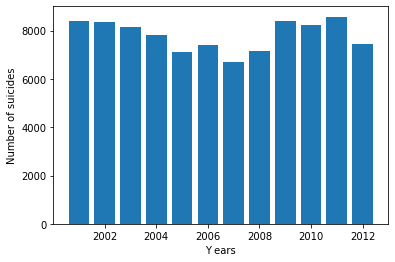

In [285]:
plt.bar(years,t)
plt.xlabel('Y ears')
plt.ylabel('Number of suicides')

* -------------------'Service (Private)'

In [286]:
t=[]
for i in years:
    t.append(state_and_UT_data[(state_and_UT_data['Gender']=='Male')&(state_and_UT_data['Type_code']=='Professional_Profile')&(state_and_UT_data['Type']=='Service (Private)')&(state_and_UT_data['Year']==i)].Total.sum())

Text(0, 0.5, 'Number of suicides')

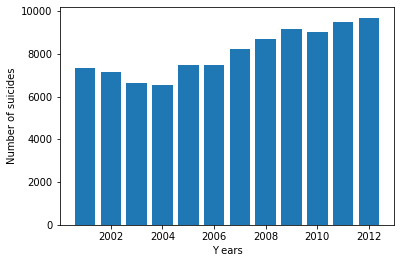

In [287]:
plt.bar(years,t)
plt.xlabel('Y ears')
plt.ylabel('Number of suicides')

* suicides in private job people seems increasing

* ------'Self-employed (Business activity)'

In [288]:
t=[]
for i in years:
    t.append(state_and_UT_data[(state_and_UT_data['Gender']=='Male')&(state_and_UT_data['Type_code']=='Professional_Profile')&(state_and_UT_data['Type']=='Self-employed (Business activity)')&(state_and_UT_data['Year']==i)].Total.sum())

Text(0, 0.5, 'Number of suicides')

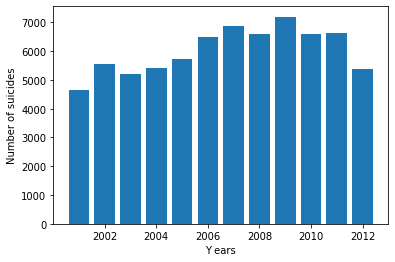

In [289]:
plt.bar(years,t)
plt.xlabel('Y ears')
plt.ylabel('Number of suicides')

* seems stable

#### Type_codes == 'Professional_Profile' , 'Female'

In [290]:
t = state_and_UT_data[state_and_UT_data['Type_code']=='Professional_Profile'].Type.unique()
len(t)

11

In [291]:
o = []
for i in t:
    o.append(state_and_UT_data[(state_and_UT_data['Gender']=='Female')&(state_and_UT_data['Type_code']=='Professional_Profile')&(state_and_UT_data['Type']==i)].Total.sum())

In [292]:
o

[5530.0,
 4231.0,
 20545.0,
 285243.0,
 5789.0,
 18622.0,
 111191.0,
 3617.0,
 1687.0,
 27300.0,
 33392.0]

<BarContainer object of 11 artists>

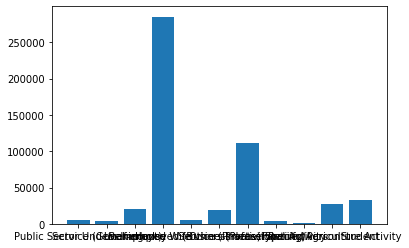

In [293]:
plt.bar(t,o)

In [294]:
sum = 0
for i in o:
    sum = sum+i
sum

517147.0

In [295]:
p=[]
for i in range(8):
    p.append([t[i],round((o[i]*100/sum),2)])
p

[['Public Sector Undertaking', 1.07],
 ['Service (Government)', 0.82],
 ['Unemployed', 3.97],
 ['House Wife', 55.16],
 ['Self-employed (Business activity)', 1.12],
 ['Service (Private)', 3.6],
 ['Others (Please Specify)', 21.5],
 ['Professional Activity', 0.7]]

In [296]:
# checking out causes contribution for 'Male' suicides
for i in range(8):
    if p[i][1]>5:
        print(p[i])

['House Wife', 55.16]
['Others (Please Specify)', 21.5]


#### !!!! 55.16 % of suicides are by 'House Wife' , 
* This indicates towards serious need, of family therapy programes.
* looing it's yearly trend

In [300]:
t=[]
for i in years:
    t.append(state_and_UT_data[(state_and_UT_data['Gender']=='Female')&(state_and_UT_data['Type_code']=='Professional_Profile')&(state_and_UT_data['Type']=='House Wife')&(state_and_UT_data['Year']==i)].Total.sum())

Text(0, 0.5, 'Number of suicides')

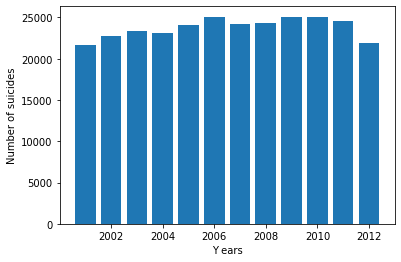

In [301]:
plt.bar(years,t)
plt.xlabel('Y ears')
plt.ylabel('Number of suicides')

* Nearly stable

In [306]:
f.Type_code.unique()

array(['Causes', 'Means_adopted', 'Professional_Profile',
       'Education_Status', 'Social_Status'], dtype=object)

#### Type_codes == 'Social_Status' , 'Male'

In [307]:
t = state_and_UT_data[state_and_UT_data['Type_code']=='Social_Status'].Type.unique()
len(t)

5

In [308]:
o = []
for i in t:
    o.append(state_and_UT_data[(state_and_UT_data['Gender']=='Male')&(state_and_UT_data['Type_code']=='Social_Status')&(state_and_UT_data['Type']==i)].Total.sum())

<BarContainer object of 5 artists>

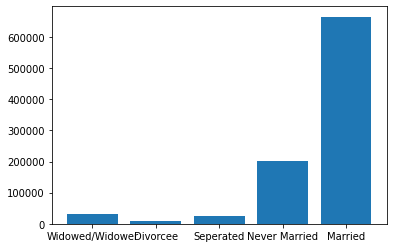

In [309]:
plt.bar(t,o)

In [310]:
sum = 0
for i in o:
    sum = sum+i
sum

931918.0

In [312]:
p=[]
for i in range(5):
    p.append([t[i],round((o[i]*100/sum),2)])
p

[['Widowed/Widower', 3.45],
 ['Divorcee', 0.81],
 ['Seperated', 2.61],
 ['Never Married', 21.77],
 ['Married', 71.36]]

* 71.36 % of suicides among men are by Married men.
* 21.77 by those who never married.

#### Type_codes == 'Social_Status' , 'Female'

In [314]:
t = state_and_UT_data[state_and_UT_data['Type_code']=='Social_Status'].Type.unique()
len(t)

5

In [315]:
o = []
for i in t:
    o.append(state_and_UT_data[(state_and_UT_data['Gender']=='Female')&(state_and_UT_data['Type_code']=='Social_Status')&(state_and_UT_data['Type']==i)].Total.sum())

<BarContainer object of 5 artists>

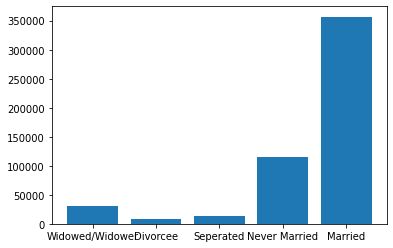

In [316]:
plt.bar(t,o)

In [ ]:
p=[]
for i in range(5):
    p.append([t[i],round((o[i]*100/sum),2)])
p

[['Widowed/Widower', 3.21],
 ['Divorcee', 0.83],
 ['Seperated', 1.52],
 ['Never Married', 12.39],
 ['Married', 38.28]]

* 38.28 % of suicides by females are by married females
* 12 % by those who never married.

#### using this analysis, government can re-allocate their funds (if any) to reduce suicides among citizens. 
#### this analysis, not only helps government to understand where need is, but also prevent fund from getting wasted. 